# Military Power Clustering Project
-World military power
Source : globalfirepower.com on 1st may 2020

- https://data.world/vizzup/world-military-power/workspace/file?filename=World+military+power.xlsx


# Import Libraries

In [146]:
# !pip install pyforest
# !pip install ipython
# !pip install pyclustertend

# 1-Import Libraies
import numpy as np
import pandas as pd 
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import scipy.stats as stats
%matplotlib inline
import statsmodels.api as sm
import statsmodels.formula.api as smf

from sklearn.compose import make_column_transformer
from sklearn.cluster import KMeans
from pyclustertend import hopkins
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

# 2-Scaling
from sklearn.preprocessing import scale 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import PowerTransformer 
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler


# 3-Importing plotly and cufflinks in offline mode
import cufflinks as cf
import plotly.offline
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

# 4-Ignore Warnings
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.warn("this will not show")

# 5-Figure&Display options
plt.rcParams["figure.figsize"] = (10, 6)
pd.set_option('max_colwidth',200)
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 200)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

#!pip install termcolor
from termcolor import colored
import missingno as msno 

# !pip3 install termcolor
import colorama
from colorama import Fore, Style  # maakes strings colored
from termcolor import colored

We have defined some useful user defined functions

In [147]:
def missing(df):
    missing_number = df.isnull().sum().sort_values(ascending=False)
    missing_percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    missing_values = pd.concat([missing_number, missing_percent], axis=1, keys=['Missing_Number', 'Missing_Percent'])
    return missing_values

def missing_values(df):
    return missing(df)[missing(df)['Missing_Number']>0]

###############################################################################

def first_looking(df):
    print(colored("Shape:", attrs=['bold']), df.shape,'\n',
          f"There is ", df.shape[0], " observation and ", df.shape[1], " columns in the dataset.", '\n',
          colored('-'*79, 'red', attrs=['bold']),
          colored("\nInfo:\n", attrs=['bold']), sep='')
    print(df.info(), '\n', 
          colored('-'*79, 'red', attrs=['bold']), sep='')
    print(colored("Number of Uniques:\n", attrs=['bold']), df.nunique(),'\n',
          colored('-'*79, 'red', attrs=['bold']), sep='')
    print(colored("Missing Values:\n", attrs=['bold']), missing_values(df),'\n', 
          colored('-'*79, 'red', attrs=['bold']), sep='')
    print(colored("All Columns:", attrs=['bold']), list(df.columns),'\n', 
          colored('-'*79, 'red', attrs=['bold']), sep='')

    df.columns= df.columns.str.lower().str.replace('&', '_').str.replace(' ', '_')

    print(colored("Columns after rename:", attrs=['bold']), list(df.columns),'\n',
              colored('-'*79, 'red', attrs=['bold']), sep='')

def duplicate_values(df):
    duplicate_values = df.duplicated(subset=None, keep='first').sum()
    if duplicate_values > 0:
        df.drop_duplicates(keep='first', inplace=True)
        print(duplicate_values, colored("duplicates were dropped", attrs=['bold']),'\n',
              colored('-'*79, 'red', attrs=['bold']), sep='')
    else:
        print(colored("No duplicates", attrs=['bold']),'\n',
              colored('-'*79, 'red', attrs=['bold']), sep='')
        
def drop_columns(df, drop_columns):
    if drop_columns !=[]:
        df.drop(drop_columns, axis=1, inplace=True)
        print(drop_columns, 'were dropped')
    else:
        print(colored('We will now check the missing values and if necessary drop some columns!!!', attrs=['bold']),'\n',
              colored('-'*79, 'red', attrs=['bold']), sep='')
        
def drop_null(df, limit):
    print('Shape:', df.shape)
    for i in df.isnull().sum().index:
        if (df.isnull().sum()[i]/df.shape[0]*100)>limit:
            print(df.isnull().sum()[i], 'percent of', i ,'null and were dropped')
            df.drop(i, axis=1, inplace=True)
            print('new shape:', df.shape)
        else:
            print(df.isnull().sum()[i], '%, percentage of missing values of', i ,'less than limit', limit, '%, so we will keep it.')
    print('New shape after missing value control:', df.shape)

###############################################################################

In [148]:
# Function for determining the number and percentages of missing values

def missing (df):
    missing_number = df.isnull().sum().sort_values(ascending=False)
    missing_percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    missing_values = pd.concat([missing_number, missing_percent], axis=1, keys=['Missing_Number', 'Missing_Percent'])
    return missing_values

In [149]:
# To view summary information about the column

def first_look(col):
    print("column name    : ", col)
    print("--------------------------------")
    print("per_of_nulls   : ", "%", round(df[col].isnull().sum()/df.shape[0]*100, 2))
    print("num_of_nulls   : ", df[col].isnull().sum())
    print("num_of_uniques : ", df[col].nunique())
    print(df[col].value_counts(dropna = False))

# Ingest Data  

This is a data that allows you to see the world military rankings in 2020 and numerical status such as the army, navy, and air force. In addition, some features such as population and economy related to military power are included as well.

For a better understanding and more information, please refer to external link text

The security of any country depends on the strength of its Army, Navy and the Air Force. That's why a considerable amount of money is budgeted to them. Countries around the world are spending billions to increase external forces, avoid external attacks and protect their respective nations.

The Global Firepower utilizes over 50 individual factors to determine a given nation’s Power Index (PwrIndx) score with categories ranging from military might and financials to logistical capability and geography.

The features in the given dataset are:

'Military Strength',
'Military Strength Power Index',
'Aircraft Strength',
'Aircraft Strength value',
'Fighter/Interceptor Strength',
'Fighter/Interceptor Strength value',
'Attack Aircraft Strength',
'Attack Aircraft Strength value',
'Transport Aircraft Fleet Strength',
'Transport Aircraft Fleet Strength value',
'Trainer Aircraft Fleet',
'Trainer Aircraft Fleet value',
'Helicopter Fleet Strength',
'Helicopter Fleet Strength value',
'Attack Helicopter Fleet Strength',
'Attack Helicopter Fleet Strength value',
'Tank Strength',
'Tank Strength value',
'AFV/APC Strength',
'AFV/APC Strength value',
'Self-Propelled Artillery Strength',
'Self-Propelled Artillery Strength value',
'Towed Artillery Strength',
'Towed Artillery Strength value',
'Rocket Projector Strength',
'Rocket Projector Strength value',
'Navy Fleet Strengths',
'Navy Fleet Strengths value',
'Aircraft Carrier Fleet Strength',
'Aircraft Carrier Fleet Strength value',
'Submarine Fleet Strength',
'Submarine Fleet Strength value',
'Destroyer Fleet Strength',
'Destroyer Fleet Strength value',
'Frigate Fleet Strength',
'Frigate Fleet Strength value',
'defense spending budget',
'defense spending budget value',
'External Debt', 'External Debt value',
'Airport Totals',
'Airport Totals value',
'Oil Production',
'Oil Production value',
'Oil Consumption',
'Oil Consumption value',
'Proven Oil Reserves',
'Proven Oil Reserves value',
'Available Manpower',
'Available Manpower value',
'Total Population',
'Total Population value',
'Total Square Land Area',
'Total Square Land Area value',
'Total Coastline Coverage',
'Total Coastline Coverage value',
'Total Waterway Coverage',
'Total Waterway Coverage value',
'Total Border Coverage',
'Total Border Coverage value'

 In the given study, we have a clustering problem.

We will try to find the clusters in the given dataset.

Lastly we will build a variety of Unsupervised algorithms including K-Means and Hierarchical Cluster Analysis (HCA).

# EDA

In [150]:
df0 = pd.read_excel("/Users/nilgun/Documents/Webisleri/dataScience/Machine Learning/Assignment4/World military power.xlsx", header=1)
df = df0.copy()

In [151]:
df.head()

Military Strength  Military Strength Power Index Aircraft Strength  \
0       Afghanistan                          1.344       Afghanistan   
1           Albania                          2.314           Albania   
2           Algeria                          0.466           Algeria   
3            Angola                          0.838            Angola   
4         Argentina                          0.652         Argentina   

   Aircraft Strength value Fighter/Interceptor Strength  \
0                  260.000                  Afghanistan   
1                   19.000                      Albania   
2                  551.000                      Algeria   
3                  295.000                       Angola   
4                  227.000                    Argentina   

   Fighter/Interceptor Strength value Attack Aircraft Strength  \
0                               0.000              Afghanistan   
1                               0.000                  Albania   
2                             103.000                  Algeria   
3                              72.000                   Angola   
4                              24.000                Argentina   

   Attack Aircraft Strength value Transport Aircraft Fleet Strength  \
0                          25.000                       Afghanistan   
1                           0.000                           Albania   
2                          22.000                           Algeria   
3                          18.000                            Angola   
4                           7.000                         Argentina   

   Transport Aircraft Fleet Strength value Trainer Aircraft Fleet  \
0                                   30.000            Afghanistan   
1                                    0.000                Albania   
2                                   59.000                Algeria   
3                                   30.000                 Angola   
4                                    9.000              Argentina   

   Trainer Aircraft Fleet value Helicopter Fleet Strength  \
0                         0.000               Afghanistan   
1                         0.000                   Albania   
2                        87.000                   Algeria   
3                        47.000                    Angola   
4                        64.000                 Argentina   

   Helicopter Fleet Strength value Attack Helicopter Fleet Strength  \
0                          187.000                      Afghanistan   
1                           19.000                          Albania   
2                          257.000                          Algeria   
3                          126.000                           Angola   
4                          100.000                        Argentina   

   Attack Helicopter Fleet Strength value Tank Strength  Tank Strength value  \
0                                   0.000   Afghanistan                0.000   
1                                   0.000       Albania                0.000   
2                                  45.000       Algeria              880.000   
3                                  15.000        Angola              379.000   
4                                   0.000     Argentina              370.000   

  AFV/APC Strength  AFV/APC Strength value Self-Propelled Artillery Strength  \
0      Afghanistan                1062.000                       Afghanistan   
1          Albania                 467.000                           Albania   
2          Algeria                7361.000                           Algeria   
3           Angola                 595.000                            Angola   
4        Argentina                 739.000                         Argentina   

   Self-Propelled Artillery Strength value Towed Artillery Strength  \
0                                    0.000              Afghanistan   
1                                    0.000                  Albania   
2     

In [152]:
first_looking(df)

Shape:(138, 60)
There is 138 observation and 60 columns in the dataset.
-------------------------------------------------------------------------------
Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138 entries, 0 to 137
Data columns (total 60 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Military Strength                        138 non-null    object 
 1   Military Strength Power Index            138 non-null    float64
 2   Aircraft Strength                        138 non-null    object 
 3   Aircraft Strength value                  138 non-null    float64
 4   Fighter/Interceptor Strength             138 non-null    object 
 5   Fighter/Interceptor Strength value       138 non-null    float64
 6   Attack Aircraft Strength                 138 non-null    object 
 7   Attack Aircraft Strength value           138 non-null    float64
 8   Transport Aircraft Fleet Streng

In [153]:
df.columns = df.columns.str.lower().str.replace('&', '_').str.replace(' ', '_')

In [154]:
df.columns

Index(['military_strength', 'military_strength_power_index',
       'aircraft_strength', 'aircraft_strength_value',
       'fighter/interceptor_strength', 'fighter/interceptor_strength_value',
       'attack_aircraft_strength', 'attack_aircraft_strength_value',
       'transport_aircraft_fleet_strength',
       'transport_aircraft_fleet_strength_value', 'trainer_aircraft_fleet',
       'trainer_aircraft_fleet_value', 'helicopter_fleet_strength',
       'helicopter_fleet_strength_value', 'attack_helicopter_fleet_strength',
       'attack_helicopter_fleet_strength_value', 'tank_strength',
       'tank_strength_value', 'afv/apc_strength', 'afv/apc_strength_value',
       'self-propelled_artillery_strength',
       'self-propelled_artillery_strength_value', 'towed_artillery_strength',
       'towed_artillery_strength_value', 'rocket_projector_strength',
       'rocket_projector_strength_value', 'navy_fleet_strengths',
       'navy_fleet_strengths_value', 'aircraft_carrier_fleet_strength',


In [155]:
print("There is", df.shape[0], "observation and", df.shape[1], "columns in the dataset")

There is 138 observation and 60 columns in the dataset


In [156]:
df.describe().T


count     mean      std    min  \
military_strength_power_index           138.000    1.461    1.324  0.061   
aircraft_strength_value                 138.000  388.471 1231.982  0.000   
fighter/interceptor_strength_value      138.000   81.565  230.325  0.000   
attack_aircraft_strength_value          138.000   25.761   94.528  0.000   
transport_aircraft_fleet_strength_value 138.000   30.232   92.330  0.000   
trainer_aircraft_fleet_value            138.000   82.833  240.804  0.000   
helicopter_fleet_strength_value         138.000  154.065  520.184  0.000   
attack_helicopter_fleet_strength_value  138.000   25.623   97.326  0.000   
tank_strength_value                     138.000  646.565 1515.464  0.000   
afv/apc_strength_value                  138.000 2485.696 5410.546  0.000   
self-propelled_artillery_strength_value 138.000  212.159  688.029  0.000   
towed_artillery_strength_value          138.000  393.978  805.782  0.000   
rocket_projector_strength_value         138.000  156.935  484.381  0.000   
navy_fleet_strengths_value              124.000   84.984  146.114  0.000   
aircraft_carrier_fleet_strength_value   115.000    0.383    1.972  0.000   
submarine_fleet_strength_value          115.000    4.800   13.707  0.000   
destroyer_fleet_strength_value          115.000    2.052   10.001  0.000   
frigate_fleet_strength_value            115.000    3.522    6.481  0.000   
airport_totals_value                    138.000  290.043 1212.967  2.000   
total_border_coverage_value             129.000 3964.225 3760.100 29.000   

                                             25%      50%      75%       max  
military_strength_power_index              0.575    1.034    2.022    10.168  
aircraft_strength_value                   33.000  111.000  290.250 13264.000  
fighter/interceptor_strength_value         0.000   17.000   60.500  2085.000  
attack_aircraft_strength_value             0.000    0.000   15.750   742.000  
transport_aircraft_fleet_strength_value    3.000    9.000   26.000   945.000  
trainer_aircraft_fleet_value               4.250   26.000   79.250  2643.000  
helicopter_fleet_strength_value           15.250   44.000  126.750  5768.000  
attack_helicopter_fleet_strength_value     0.000    2.000   17.750   967.000  
tank_strength_value                       19.250  153.000  436.250 12950.000  
afv/apc_strength_value                   250.250  734.500 2000.000 39253.000  
self-propelled_artillery_strength_value    0.000   23.000   97.250  6083.000  
towed_artillery_strength_value            24.250  108.000  296.500  4465.000  
rocket_projector_strength_value            0.000   24.000   99.750  3860.000  
navy_fleet_strengths_value                10.000   38.000   77.750   984.000  
aircraft_carrier_fleet_strength_value      0.000    0.000    0.000    20.000  
submarine_fleet_strength_value             0.000    0.000    4.000    83.000  
destroyer_fleet_strength_value             0.000    0.000    0.000    91.000  
frigate_fleet_strength_value               0.000    0.000    5.500    52.000  
airport_totals_value                      33.500   68.000  150.750 13513.000  
total_border_coverage_value             1587.000 2816.000 5267.000 22457.000

In [157]:
df.describe(include=object).T

count  unique             top   freq
military_strength                     138     138     Afghanistan      1
aircraft_strength                     138     138     Afghanistan      1
fighter/interceptor_strength          138     138     Afghanistan      1
attack_aircraft_strength              138     138     Afghanistan      1
transport_aircraft_fleet_strength     138     138     Afghanistan      1
trainer_aircraft_fleet                138     138     Afghanistan      1
helicopter_fleet_strength             138     138     Afghanistan      1
attack_helicopter_fleet_strength      138     138     Afghanistan      1
tank_strength                         138     138     Afghanistan      1
afv/apc_strength                      138     138     Afghanistan      1
self-propelled_artillery_strength     138     138     Afghanistan      1
towed_artillery_strength              138     138     Afghanistan      1
rocket_projector_strength             138     138     Afghanistan      1
navy_fleet_strengths                  124     124     Afghanistan      1
aircraft_carrier_fleet_strength       115     115     Afghanistan      1
submarine_fleet_strength              115     115     Afghanistan      1
destroyer_fleet_strength              115     115     Afghanistan      1
frigate_fleet_strength                115     115     Afghanistan      1
defense_spending_budget               138     138     Afghanistan      1
defense_spending_budget_value         138     124  2,50,00,00,000      3
external_debt                         138     138     Afghanistan      1
external_debt_value                   138     138  2,84,00,00,000      1
airport_totals                        138     138     Afghanistan      1
oil_production                        138     138     Afghanistan      1
oil_production_value              138.000  88.000           0.000 46.000
oil_consumption                       138     138     Afghanistan      1
oil_consumption_value             138.000 102.000       18500.000  4.000
proven_oil_reserves                   138     138     Afghanistan      1
proven_oil_reserves_value         138.000  84.000           0.000 46.000
available_manpower                    138     138     Afghanistan      1
available_manpower_value              138     138     1,43,25,743      1
total_population                      138     138     Afghanistan      1
total_population_value                138     138     3,49,40,837      1
total_square_land_area                138     138     Afghanistan      1
total_square_land_area_value          138     138        6,52,230      1
total_coastline_coverage              109     109     Afghanistan      1
total_coastline_coverage_value    109.000 104.000         853.000  2.000
total_waterway_coverage               138     138     Afghanistan      1
total_waterway_coverage_value     138.000  92.000           0.000 38.000
total_border_coverage                 129     129     Afghanistan      1

In [158]:
df.nunique()

military_strength                          138
military_strength_power_index              138
aircraft_strength                          138
aircraft_strength_value                    113
fighter/interceptor_strength               138
fighter/interceptor_strength_value          63
attack_aircraft_strength                   138
attack_aircraft_strength_value              38
transport_aircraft_fleet_strength          138
transport_aircraft_fleet_strength_value     49
trainer_aircraft_fleet                     138
trainer_aircraft_fleet_value                77
helicopter_fleet_strength                  138
helicopter_fleet_strength_value             97
attack_helicopter_fleet_strength           138
attack_helicopter_fleet_strength_value      45
tank_strength                              138
tank_strength_value                        106
afv/apc_strength                           138
afv/apc_strength_value                     130
self-propelled_artillery_strength          138
self-propelle

In [159]:
# to find how many unique values object features have

for col in df.select_dtypes(include=[np.number]).columns:
  print(f"{col} has {df[col].nunique()} unique value")

military_strength_power_index has 138 unique value
aircraft_strength_value has 113 unique value
fighter/interceptor_strength_value has 63 unique value
attack_aircraft_strength_value has 38 unique value
transport_aircraft_fleet_strength_value has 49 unique value
trainer_aircraft_fleet_value has 77 unique value
helicopter_fleet_strength_value has 97 unique value
attack_helicopter_fleet_strength_value has 45 unique value
tank_strength_value has 106 unique value
afv/apc_strength_value has 130 unique value
self-propelled_artillery_strength_value has 70 unique value
towed_artillery_strength_value has 91 unique value
rocket_projector_strength_value has 68 unique value
navy_fleet_strengths_value has 78 unique value
aircraft_carrier_fleet_strength_value has 5 unique value
submarine_fleet_strength_value has 20 unique value
destroyer_fleet_strength_value has 11 unique value
frigate_fleet_strength_value has 18 unique value
airport_totals_value has 108 unique value
total_border_coverage_value has 1

In [160]:
df.duplicated().value_counts()

False    138
dtype: int64

In [161]:
duplicate = df[df.duplicated()]


In [162]:
duplicate


Empty DataFrame
Columns: [military_strength, military_strength_power_index, aircraft_strength, aircraft_strength_value, fighter/interceptor_strength, fighter/interceptor_strength_value, attack_aircraft_strength, attack_aircraft_strength_value, transport_aircraft_fleet_strength, transport_aircraft_fleet_strength_value, trainer_aircraft_fleet, trainer_aircraft_fleet_value, helicopter_fleet_strength, helicopter_fleet_strength_value, attack_helicopter_fleet_strength, attack_helicopter_fleet_strength_value, tank_strength, tank_strength_value, afv/apc_strength, afv/apc_strength_value, self-propelled_artillery_strength, self-propelled_artillery_strength_value, towed_artillery_strength, towed_artillery_strength_value, rocket_projector_strength, rocket_projector_strength_value, navy_fleet_strengths, navy_fleet_strengths_value, aircraft_carrier_fleet_strength, aircraft_carrier_fleet_strength_value, submarine_fleet_strength, submarine_fleet_strength_value, destroyer_fleet_strength, destroyer_fleet_strength_value, frigate_fleet_strength, frigate_fleet_strength_value, defense_spending_budget, defense_spending_budget_value, external_debt, external_debt_value, airport_totals, airport_totals_value, oil_production, oil_production_value, oil_consumption, oil_consumption_value, proven_oil_reserves, proven_oil_reserves_value, available_manpower, available_manpower_value, total_population, total_population_value, total_square_land_area, total_square_land_area_value, total_coastline_coverage, total_coastline_coverage_value, total_waterway_coverage, total_waterway_coverage_value, total_border_coverage, total_border_coverage_value]
Index: []

In [163]:
df.drop_duplicates(keep=False, inplace=True)


In [164]:
df.shape


(138, 60)

## Implement basic steps to see how is your data looks like

## Convert multi index columns to one level

In [165]:
df.rename(columns={'military_strength': 'country'}, inplace=True)

## Detect and drop duplicated columns

In [166]:
value_cols = [i[0] for i in df.columns.str.findall(".*value") if i !=[]]

value_cols

['aircraft_strength_value',
 'fighter/interceptor_strength_value',
 'attack_aircraft_strength_value',
 'transport_aircraft_fleet_strength_value',
 'trainer_aircraft_fleet_value',
 'helicopter_fleet_strength_value',
 'attack_helicopter_fleet_strength_value',
 'tank_strength_value',
 'afv/apc_strength_value',
 'self-propelled_artillery_strength_value',
 'towed_artillery_strength_value',
 'rocket_projector_strength_value',
 'navy_fleet_strengths_value',
 'aircraft_carrier_fleet_strength_value',
 'submarine_fleet_strength_value',
 'destroyer_fleet_strength_value',
 'frigate_fleet_strength_value',
 'defense_spending_budget_value',
 'external_debt_value',
 'airport_totals_value',
 'oil_production_value',
 'oil_consumption_value',
 'proven_oil_reserves_value',
 'available_manpower_value',
 'total_population_value',
 'total_square_land_area_value',
 'total_coastline_coverage_value',
 'total_waterway_coverage_value',
 'total_border_coverage_value']

In [167]:
value_df = df[value_cols].copy()
value_df.insert(0, "country", df["country"])
value_df.insert(1, "Military Strength Power Index", df["military_strength_power_index"])
value_df.head()

country  Military Strength Power Index  aircraft_strength_value  \
0  Afghanistan                          1.344                  260.000   
1      Albania                          2.314                   19.000   
2      Algeria                          0.466                  551.000   
3       Angola                          0.838                  295.000   
4    Argentina                          0.652                  227.000   

   fighter/interceptor_strength_value  attack_aircraft_strength_value  \
0                               0.000                          25.000   
1                               0.000                           0.000   
2                             103.000                          22.000   
3                              72.000                          18.000   
4                              24.000                           7.000   

   transport_aircraft_fleet_strength_value  trainer_aircraft_fleet_value  \
0                                   30.000                         0.000   
1                                    0.000                         0.000   
2                                   59.000                        87.000   
3                                   30.000                        47.000   
4                                    9.000                        64.000   

   helicopter_fleet_strength_value  attack_helicopter_fleet_strength_value  \
0                          187.000                                   0.000   
1                           19.000                                   0.000   
2                          257.000                                  45.000   
3                          126.000                                  15.000   
4                          100.000                                   0.000   

   tank_strength_value  afv/apc_strength_value  \
0                0.000                1062.000   
1                0.000                 467.000   
2              880.000                7361.000   
3              379.000                 595.000   
4              370.000                 739.000   

   self-propelled_artillery_strength_value  towed_artillery_strength_value  \
0                                    0.000                         176.000   
1                                    0.000                           0.000   
2                                  320.000                         240.000   
3                                   28.000                         357.000   
4                                   83.000                         172.000   

   rocket_projector_strength_value  navy_fleet_strengths_value  \
0                           50.000                       0.000   
1                            0.000                      38.000   
2                          316.000                     201.000   
3                          115.000                      57.000   
4                           26.000                      49.000   

   aircraft_carrier_fleet_strength_value  submarine_fleet_strength_value  \
0                                  0.000                           0.000   
1                                  0.000                           0.000   
2                                  0.000                           6.000   
3                                  0.000                           0.000   
4                                  0.000                           2.000   

   destroyer_fleet_strength_value  frigate_fleet_strength_value  \
0                           0.000                         0.000   
1                           0.000                         0.000   
2                           0.000                         5.000   
3                           0.000                         0.000   
4                           4.000                         0.000   

  defense_spending_budget_value external_debt_value  airport_totals_value  \
0               12,00,00,00,000      2,84,00,00,000                43.000   
1               

In [168]:
df.shape

(138, 60)

## Check for missing values 

In [169]:
missing(df)

Missing_Number  Missing_Percent
total_coastline_coverage_value                       29            0.210
total_coastline_coverage                             29            0.210
submarine_fleet_strength                             23            0.167
frigate_fleet_strength_value                         23            0.167
frigate_fleet_strength                               23            0.167
destroyer_fleet_strength_value                       23            0.167
destroyer_fleet_strength                             23            0.167
submarine_fleet_strength_value                       23            0.167
aircraft_carrier_fleet_strength_value                23            0.167
aircraft_carrier_fleet_strength                      23            0.167
navy_fleet_strengths                                 14            0.101
navy_fleet_strengths_value                           14            0.101
total_border_coverage                                 9            0.065
total_border_coverage_value                           9            0.065
attack_helicopter_fleet_strength                      0            0.000
available_manpower                                    0            0.000
external_debt_value                                   0            0.000
airport_totals                                        0            0.000
airport_totals_value                                  0            0.000
oil_production                                        0            0.000
oil_production_value                                  0            0.000
oil_consumption                                       0            0.000
oil_consumption_value                                 0            0.000
proven_oil_reserves                                   0            0.000
proven_oil_reserves_value                             0            0.000
available_manpower_value                              0            0.000
attack_helicopter_fleet_strength_value                0            0.000
total_population                                      0            0.000
total_population_value                                0            0.000
total_square_land_area                                0            0.000
total_square_land_area_value                          0            0.000
fighter/interceptor_strength                          0            0.000
aircraft_strength_value                               0            0.000
total_waterway_coverage                               0            0.000
total_waterway_coverage_value                         0            0.000
aircraft_strength                                     0            0.000
external_debt                                         0            0.000
defense_spending_budget_value                         0            0.000
defense_spending_budget                               0            0.000
fighter/interceptor_strength_value                    0            0.000
tank_strength                                         0            0.000
tank_strength_value                                   0            0.000
afv/apc_strength                                      0            0.000
afv/apc_strength_value                                0            0.000
self-propelled_artillery_strength                     0            0.000
self-propelled_artillery_strength_value               0            0.000
towed_artillery_strength                              0            0.000
towed_artillery_strength_value                        0            0.000
rocket_projector_strength                             0            0.000
rocket_projector_strength_value                       0            0.000
helicopter_fleet_strength_value                       0            0.000
helicopter_fleet_strength                             0            0.000
trainer_aircraft_fleet_value                          0            0.000
trainer_aircraft_fleet                                0            0.000
military_strength_power_in

## Deal with missing values 
* Hint-1, use wikipedia to fill in missing values ​​comparing with similar countries
* Hint-2, Georeferences of countries can help you

In [170]:
df.isnull().melt(value_name="missing")

variable  missing
0                         country    False
1                         country    False
2                         country    False
3                         country    False
4                         country    False
...                           ...      ...
8275  total_border_coverage_value    False
8276  total_border_coverage_value    False
8277  total_border_coverage_value    False
8278  total_border_coverage_value    False
8279  total_border_coverage_value    False

[8280 rows x 2 columns]

<Figure size 288x432 with 0 Axes>

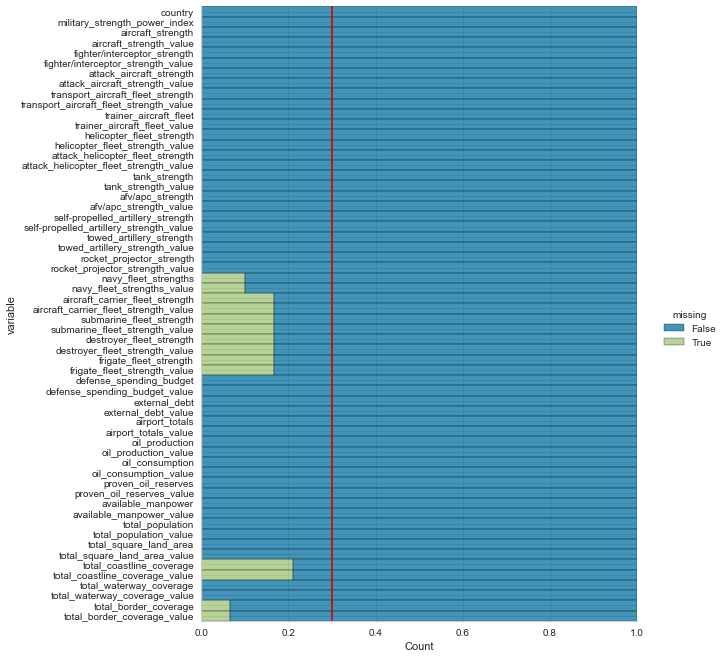

In [171]:
plt.figure(figsize=(4,6))

sns.displot(
    data=df.isnull().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    height=9.25
)

plt.axvline(0.3,color="r");

In [172]:
with pd.option_context('display.max_columns', None):
    display(df[df["total_coastline_coverage"].isna()])

country  military_strength_power_index  \
5                     Armenia                          2.125   
7                     Austria                          0.957   
11                    Belarus                          0.818   
13                     Bhutan                         10.168   
14                    Bolivia                          0.994   
16                   Botswana                          2.058   
19               Burkina Faso                          1.901   
23   Central African Republic                          3.289   
24                       Chad                          1.638   
30                    Czechia                          0.553   
38                   Ethiopia                          0.858   
48                    Hungary                          0.822   
62                 Kyrgyzstan                          1.924   
63                       Laos                          3.443   
71                       Mali                          1.894   
74                    Moldova                          2.129   
75                   Mongolia                          2.030   
81                      Nepal                          2.989   
85                      Niger                          2.015   
88            North Macedonia                          3.181   
93                   Paraguay                          2.190   
103                    Serbia                          0.948   
106                  Slovakia                          0.847   
111               South Sudan                          2.350   
117               Switzerland                          0.526   
120                Tajikistan                          1.866   
126                    Uganda                          1.618   
136                    Zambia                          1.646   
137                  Zimbabwe                          1.758   

            aircraft_strength  aircraft_strength_value  \
5                     Armenia                   64.000   
7                     Austria                  120.000   
11                    Belarus                  202.000   
13                     Bhutan                    2.000   
14                    Bolivia                   69.000   
16                   Botswana                   45.000   
19               Burkina Faso                   16.000   
23   Central African Republic                    3.000   
24                       Chad                   35.000   
30                    Czechia                   95.000   
38                   Ethiopia                   86.000   
48                    Hungary                   47.000   
62                 Kyrgyzstan                    5.000   
63                       Laos                   33.000   
71                       Mali                   29.000   
74                    Moldova                    3.000   
75                   Mongolia                    9.000   
81                      Nepal                   16.000   
85                      Niger                   16.000   
88            North Macedonia                   20.000   
93                   Paraguay                   33.000   
103                    Serbia                  109.000   
106                  Slovakia                   47.000   
111               South Sudan                   19.000   
117               Switzerland                  169.000   
120                Tajikistan                   25.000   
126                    Uganda                   48.000   
136                    Zambia                  108.000   
137                  Zimbabwe                   90.000   

    fighter/interceptor_strength  fighter/interceptor_strength_value  \
5                        Armenia                               0.000   
7                        Austria                              15.000   
11                       Belarus                              39.000   
13                        Bhutan                               0.000   


In [173]:
value_df.loc[value_df["total_coastline_coverage_value"].isnull(), ['country',
                                                                             'navy_fleet_strengths_value',
                                                                             'aircraft_carrier_fleet_strength_value',
                                                                             'submarine_fleet_strength_value',
                                                                             'destroyer_fleet_strength_value',
                                                                             'frigate_fleet_strength_value',
                                                                             'total_waterway_coverage_value']]

country  navy_fleet_strengths_value  \
5                     Armenia                       0.000   
7                     Austria                       0.000   
11                    Belarus                       0.000   
13                     Bhutan                       0.000   
14                    Bolivia                     173.000   
16                   Botswana                         NaN   
19               Burkina Faso                         NaN   
23   Central African Republic                         NaN   
24                       Chad                         NaN   
30                    Czechia                         NaN   
38                   Ethiopia                         NaN   
48                    Hungary                         NaN   
62                 Kyrgyzstan                         NaN   
63                       Laos                      36.000   
71                       Mali                         NaN   
74                    Moldova                         NaN   
75                   Mongolia                         NaN   
81                      Nepal                         NaN   
85                      Niger                         NaN   
88            North Macedonia                         NaN   
93                   Paraguay                      40.000   
103                    Serbia                      19.000   
106                  Slovakia                       0.000   
111               South Sudan                       0.000   
117               Switzerland                       0.000   
120                Tajikistan                       0.000   
126                    Uganda                       8.000   
136                    Zambia                       0.000   
137                  Zimbabwe                       0.000   

     aircraft_carrier_fleet_strength_value  submarine_fleet_strength_value  \
5                                      NaN                             NaN   
7                                      NaN                             NaN   
11                                     NaN                             NaN   
13                                     NaN                             NaN   
14                                   0.000                           0.000   
16                                     NaN                             NaN   
19                                     NaN                             NaN   
23                                     NaN                             NaN   
24                                     NaN                             NaN   
30                                     NaN                             NaN   
38                                     NaN                             NaN   
48                                     NaN                             NaN   
62                                     NaN                             NaN   
63                                   0.000                           0.000   
71                                     NaN                             NaN   
74                                     NaN                             NaN   
75                                     NaN                             NaN   
81                                     NaN                             NaN   
85                                     NaN                             NaN   
88                                     NaN                             NaN   
93                                   0.000                           0.000   
103                                  0.000                           0.000   
106                                    NaN                             NaN   
111                                  2.000                          22.000   
117                                    NaN                             NaN   
120                                    NaN                             NaN   
126                                  0.000                           0.000   
136    

In [174]:
value_df.loc[value_df["total_coastline_coverage_value"].isnull(),
    
    ['navy_fleet_strengths_value',
     'aircraft_carrier_fleet_strength_value',
     'submarine_fleet_strength_value',
     'destroyer_fleet_strength_value',
     'frigate_fleet_strength_value',
     'total_waterway_coverage_value']
    
    ] = 0

<Figure size 288x432 with 0 Axes>

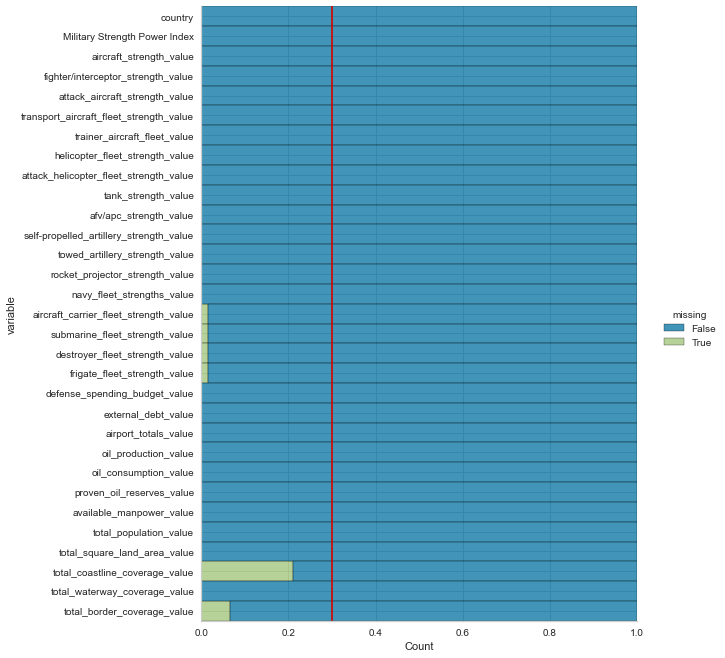

In [175]:
plt.figure(figsize=(4,6))

sns.displot(
    data=value_df.isnull().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    height=9.25
)

plt.axvline(0.3,color="r");

In [176]:
value_df.columns

Index(['country', 'Military Strength Power Index', 'aircraft_strength_value',
       'fighter/interceptor_strength_value', 'attack_aircraft_strength_value',
       'transport_aircraft_fleet_strength_value',
       'trainer_aircraft_fleet_value', 'helicopter_fleet_strength_value',
       'attack_helicopter_fleet_strength_value', 'tank_strength_value',
       'afv/apc_strength_value', 'self-propelled_artillery_strength_value',
       'towed_artillery_strength_value', 'rocket_projector_strength_value',
       'navy_fleet_strengths_value', 'aircraft_carrier_fleet_strength_value',
       'submarine_fleet_strength_value', 'destroyer_fleet_strength_value',
       'frigate_fleet_strength_value', 'defense_spending_budget_value',
       'external_debt_value', 'airport_totals_value', 'oil_production_value',
       'oil_consumption_value', 'proven_oil_reserves_value',
       'available_manpower_value', 'total_population_value',
       'total_square_land_area_value', 'total_coastline_coverage_value

In [177]:
value_df.loc[value_df['aircraft_carrier_fleet_strength_value'].isnull()|
             value_df['submarine_fleet_strength_value'].isnull()|
             value_df['destroyer_fleet_strength_value'].isnull()|
             value_df['frigate_fleet_strength_value'].isnull()] 

country  Military Strength Power Index  aircraft_strength_value  \
110  South Korea                          0.151                 1649.000   
132   Uzbekistan                          0.809                  185.000   

     fighter/interceptor_strength_value  attack_aircraft_strength_value  \
110                             414.000                          71.000   
132                              66.000                          20.000   

     transport_aircraft_fleet_strength_value  trainer_aircraft_fleet_value  \
110                                   41.000                       298.000   
132                                   18.000                         2.000   

     helicopter_fleet_strength_value  attack_helicopter_fleet_strength_value  \
110                          803.000                                 112.000   
132                           79.000                                  25.000   

     tank_strength_value  afv/apc_strength_value  \
110             2614.000               14000.000   
132              420.000                1215.000   

     self-propelled_artillery_strength_value  towed_artillery_strength_value  \
110                                 3040.000                        3854.000   
132                                  137.000                           0.000   

     rocket_projector_strength_value  navy_fleet_strengths_value  \
110                          575.000                     234.000   
132                           98.000                       0.000   

     aircraft_carrier_fleet_strength_value  submarine_fleet_strength_value  \
110                                    NaN                             NaN   
132                                    NaN                             NaN   

     destroyer_fleet_strength_value  frigate_fleet_strength_value  \
110                             NaN                           NaN   
132                             NaN                           NaN   

    defense_spending_budget_value external_debt_value  airport_totals_value  \
110               44,00,00,00,000   3,84,60,00,00,000               111.000   
132                  97,50,00,000     16,90,00,00,000                53.000   

    oil_production_value oil_consumption_value proven_oil_reserves_value  \
110                0.000             28,00,000                     0.000   
132            46070.000              1,42,000              59,40,00,000   

    available_manpower_value total_population_value  \
110              2,57,09,049            5,14,18,097   
132              1,59,12,566            3,00,23,709   

    total_square_land_area_value total_coastline_coverage_value  \
110                    99720.000                       2413.000   
132                     4,47,400                        420.000   

    total_waterway_coverage_value  total_border_coverage_value  
110                      1600.000                      237.000  
132                      1100.000                     6893.000

In [178]:
value_df.loc[value_df["country"] == "Uzbekistan",
            ['navy_fleet_strengths_value',
             'aircraft_carrier_fleet_strength_value',
             'submarine_fleet_strength_value',
             'destroyer_fleet_strength_value',
             'frigate_fleet_strength_value',
           ]] 

navy_fleet_strengths_value  aircraft_carrier_fleet_strength_value  \
132                       0.000                                    NaN   

     submarine_fleet_strength_value  destroyer_fleet_strength_value  \
132                             NaN                             NaN   

     frigate_fleet_strength_value  
132                           NaN

In [179]:
value_df.loc[value_df["country"] == "Uzbekistan",
            ['navy_fleet_strengths_value',
             'aircraft_carrier_fleet_strength_value',
             'submarine_fleet_strength_value',
             'destroyer_fleet_strength_value',
             'frigate_fleet_strength_value',
           ]] = 0

In [180]:
value_df.loc[value_df["country"] == "South Korea",
            ['navy_fleet_strengths_value',
             'aircraft_carrier_fleet_strength_value',
             'submarine_fleet_strength_value',
             'destroyer_fleet_strength_value',
             'frigate_fleet_strength_value',
           ]] 

navy_fleet_strengths_value  aircraft_carrier_fleet_strength_value  \
110                     234.000                                    NaN   

     submarine_fleet_strength_value  destroyer_fleet_strength_value  \
110                             NaN                             NaN   

     frigate_fleet_strength_value  
110                           NaN

In [181]:
value_df.loc[((value_df['navy_fleet_strengths_value'] > 200) & 
             (value_df['navy_fleet_strengths_value'] < 250)),
            ['country',
             'navy_fleet_strengths_value',
             'aircraft_carrier_fleet_strength_value',
             'submarine_fleet_strength_value',
             'destroyer_fleet_strength_value',
             'frigate_fleet_strength_value',
           ]] 

country  navy_fleet_strengths_value  \
2        Algeria                     201.000   
39       Finland                     246.000   
55         Italy                     249.000   
110  South Korea                     234.000   

     aircraft_carrier_fleet_strength_value  submarine_fleet_strength_value  \
2                                    0.000                           6.000   
39                                   0.000                           0.000   
55                                   2.000                           8.000   
110                                    NaN                             NaN   

     destroyer_fleet_strength_value  frigate_fleet_strength_value  
2                             0.000                         5.000  
39                            0.000                         0.000  
55                            4.000                        12.000  
110                             NaN                           NaN

In [182]:
value_df.loc[value_df["country"] == "France",
            ['country',
             'navy_fleet_strengths_value',
             'aircraft_carrier_fleet_strength_value',
             'submarine_fleet_strength_value',
             'destroyer_fleet_strength_value',
             'frigate_fleet_strength_value',
           ]] 

country  navy_fleet_strengths_value  aircraft_carrier_fleet_strength_value  \
40  France                     180.000                                  4.000   

    submarine_fleet_strength_value  destroyer_fleet_strength_value  \
40                           9.000                          11.000   

    frigate_fleet_strength_value  
40                        11.000

In [183]:
value_df.loc[value_df["country"] == "South Korea",'aircraft_carrier_fleet_strength_value'] = 2
value_df.loc[value_df["country"] == "South Korea",'submarine_fleet_strength_value'] = 19
value_df.loc[value_df["country"] == "South Korea",'destroyer_fleet_strength_value'] = 12
value_df.loc[value_df["country"] == "South Korea",'frigate_fleet_strength_value'] = 12

<Figure size 288x432 with 0 Axes>

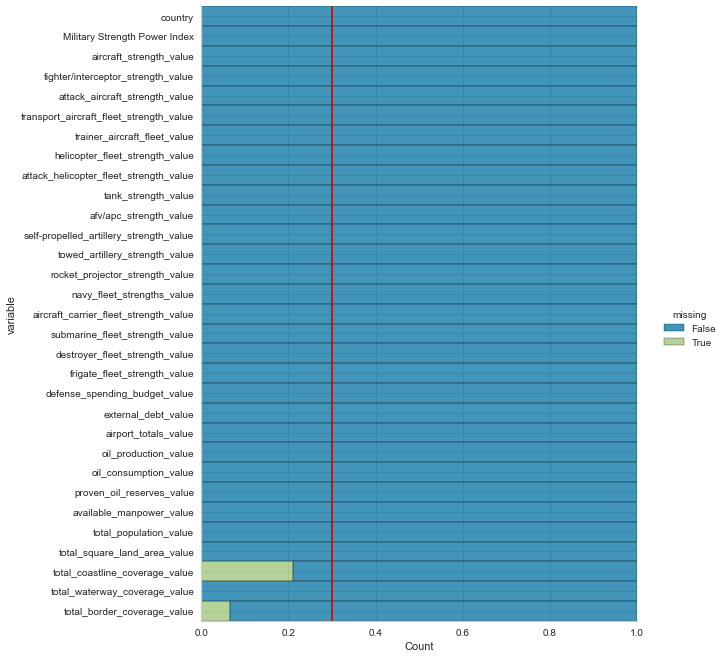

In [184]:
plt.figure(figsize=(4,6))

sns.displot(
    data=value_df.isnull().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    height=9.25
)

plt.axvline(0.3,color="r");

In [185]:
value_df.loc[value_df['total_coastline_coverage_value'].isnull()]

country  Military Strength Power Index  \
5                     Armenia                          2.125   
7                     Austria                          0.957   
11                    Belarus                          0.818   
13                     Bhutan                         10.168   
14                    Bolivia                          0.994   
16                   Botswana                          2.058   
19               Burkina Faso                          1.901   
23   Central African Republic                          3.289   
24                       Chad                          1.638   
30                    Czechia                          0.553   
38                   Ethiopia                          0.858   
48                    Hungary                          0.822   
62                 Kyrgyzstan                          1.924   
63                       Laos                          3.443   
71                       Mali                          1.894   
74                    Moldova                          2.129   
75                   Mongolia                          2.030   
81                      Nepal                          2.989   
85                      Niger                          2.015   
88            North Macedonia                          3.181   
93                   Paraguay                          2.190   
103                    Serbia                          0.948   
106                  Slovakia                          0.847   
111               South Sudan                          2.350   
117               Switzerland                          0.526   
120                Tajikistan                          1.866   
126                    Uganda                          1.618   
136                    Zambia                          1.646   
137                  Zimbabwe                          1.758   

     aircraft_strength_value  fighter/interceptor_strength_value  \
5                     64.000                               0.000   
7                    120.000                              15.000   
11                   202.000                              39.000   
13                     2.000                               0.000   
14                    69.000                               0.000   
16                    45.000                              10.000   
19                    16.000                               0.000   
23                     3.000                               0.000   
24                    35.000                               0.000   
30                    95.000                              12.000   
38                    86.000                              24.000   
48                    47.000                              12.000   
62                     5.000                               0.000   
63                    33.000                               0.000   
71                    29.000                               9.000   
74                     3.000                               0.000   
75                     9.000                               0.000   
81                    16.000                               0.000   
85                    16.000                               0.000   
88                    20.000                               0.000   
93                    33.000                               0.000   
103                  109.000                               9.000   
106                   47.000                              10.000   
111                   19.000                               0.000   
117                  169.000                              54.000   
120                   25.000                               0.000   
126                   48.000                              10.000   
136                  108.000                              18.000   
137                   90.000                              10.000   

     attack_aircraft_strength_value  transport_aircraft_flee

In [186]:
value_df.loc[value_df['total_coastline_coverage_value'].isnull(), 
                      'total_coastline_coverage_value']  = 0 

In [187]:
value_df.loc[value_df['total_border_coverage_value'].isnull()]

country  Military Strength Power Index  aircraft_strength_value  \
6      Australia                          0.323                  464.000   
9        Bahrain                          1.855                  109.000   
57         Japan                          0.150                 1561.000   
69    Madagascar                          3.087                    6.000   
83   New Zealand                          1.368                   48.000   
95   Philippines                          0.785                  171.000   
105    Singapore                          0.797                  235.000   
113    Sri Lanka                          1.466                   77.000   
119       Taiwan                          0.401                  744.000   

     fighter/interceptor_strength_value  attack_aircraft_strength_value  \
6                                82.000                           6.000   
9                                17.000                           0.000   
57                              279.000                          12.000   
69                                0.000                           0.000   
83                                0.000                           0.000   
95                                0.000                          19.000   
105                             100.000                           0.000   
113                               0.000                           0.000   
119                             289.000                           0.000   

     transport_aircraft_fleet_strength_value  trainer_aircraft_fleet_value  \
6                                     38.000                       174.000   
9                                      2.000                        37.000   
57                                    60.000                       427.000   
69                                     0.000                         0.000   
83                                     7.000                        13.000   
95                                    23.000                        24.000   
105                                    9.000                        36.000   
113                                   15.000                         6.000   
119                                   19.000                       207.000   

     helicopter_fleet_strength_value  attack_helicopter_fleet_strength_value  \
6                            133.000                                  22.000   
9                             65.000                                  22.000   
57                           637.000                                 119.000   
69                             6.000                                   0.000   
83                            22.000                                   0.000   
95                            97.000                                   0.000   
105                           77.000                                  17.000   
113                           54.000                                   9.000   
119                          210.000                                  91.000   

     tank_strength_value  afv/apc_strength_value  \
6                 59.000                3051.000   
9                180.000                 843.000   
57              1004.000                3130.000   
69                12.000                 103.000   
83                 0.000                 200.000   
95                 7.000                 513.000   
105              180.000                3000.000   
113              202.000                 570.000   
119             1180.000                2000.000   

     self-propelled_artillery_strength_value  towed_artillery_strength_value  \
6                                      0.000                          54.000   
9                                     33.000                          26.000   
57                                   238.000                         500.000   
69                                     0.000                          25.0

In [188]:
value_df.loc[value_df['total_border_coverage_value'].isnull(), 
                      'total_border_coverage_value' ] = 0

<Figure size 288x432 with 0 Axes>

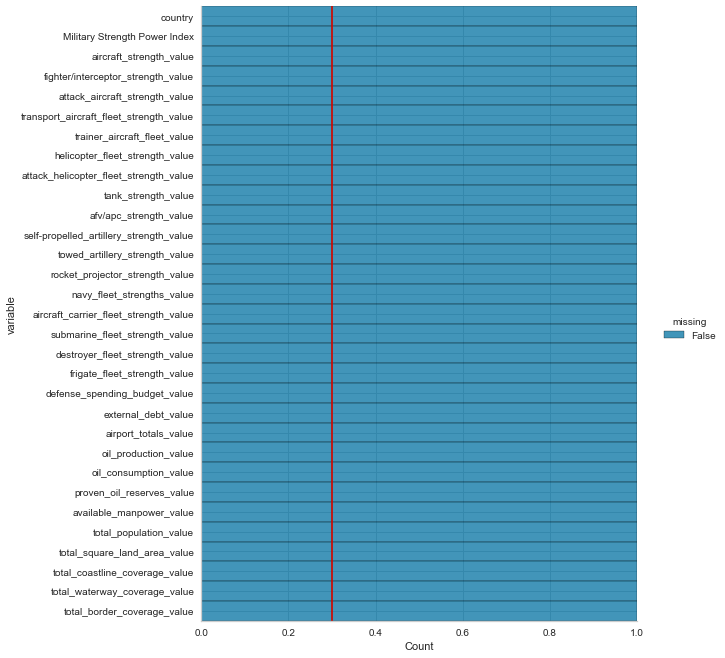

In [189]:
plt.figure(figsize=(4,6))

sns.displot(
    data=value_df.isnull().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    height=9.25
)

plt.axvline(0.3,color="r");

In [190]:
value_df.reset_index(drop=True, inplace=True)

In [191]:
value_df

country  Military Strength Power Index  \
0                         Afghanistan                          1.344   
1                             Albania                          2.314   
2                             Algeria                          0.466   
3                              Angola                          0.838   
4                           Argentina                          0.652   
5                             Armenia                          2.125   
6                           Australia                          0.323   
7                             Austria                          0.957   
8                          Azerbaijan                          0.946   
9                             Bahrain                          1.855   
10                         Bangladesh                          0.707   
11                            Belarus                          0.818   
12                            Belgium                          1.050   
13                             Bhutan                         10.168   
14                            Bolivia                          0.994   
15             Bosnia and Herzegovina                          3.859   
16                           Botswana                          2.058   
17                             Brazil                          0.199   
18                           Bulgaria                          0.892   
19                       Burkina Faso                          1.901   
20                           Cambodia                          2.056   
21                           Cameroon                          1.990   
22                             Canada                          0.371   
23           Central African Republic                          3.289   
24                               Chad                          1.638   
25                              Chile                          0.767   
26                              China                          0.069   
27                           Colombia                          0.605   
28                            Croatia                          1.018   
29                               Cuba                          1.221   
30                            Czechia                          0.553   
31   Democratic Republic of the Congo                          1.139   
32                            Denmark                          0.788   
33                 Dominican Republic                          2.750   
34                            Ecuador                          1.006   
35                              Egypt                          0.187   
36                        El Salvador                          3.129   
37                            Estonia                          2.589   
38                           Ethiopia                          0.858   
39                            Finland                          0.850   
40                             France                          0.170   
41                              Gabon                          3.374   
42                            Georgia                          1.668   
43                            Germany                          0.219   
44                              Ghana                          2.055   
45                             Greece                          0.531   
46                          Guatemala                          1.830   
47                           Honduras                          2.094   
48                            Hungary                          0.822   
49                              India                          0.095   
50                          Indonesia                          0.254   
51                               Iran                          0.219   
52                               Iraq                          0.791   
53                            Ireland                          1.948   
54                             Israel                          0.311  

## Fix the dtypes

In [192]:
value_df.dtypes

country                                     object
Military Strength Power Index              float64
aircraft_strength_value                    float64
fighter/interceptor_strength_value         float64
attack_aircraft_strength_value             float64
transport_aircraft_fleet_strength_value    float64
trainer_aircraft_fleet_value               float64
helicopter_fleet_strength_value            float64
attack_helicopter_fleet_strength_value     float64
tank_strength_value                        float64
afv/apc_strength_value                     float64
self-propelled_artillery_strength_value    float64
towed_artillery_strength_value             float64
rocket_projector_strength_value            float64
navy_fleet_strengths_value                 float64
aircraft_carrier_fleet_strength_value      float64
submarine_fleet_strength_value             float64
destroyer_fleet_strength_value             float64
frigate_fleet_strength_value               float64
defense_spending_budget_value  

In [193]:
value_df.select_dtypes("object").columns

Index(['country', 'defense_spending_budget_value', 'external_debt_value',
       'oil_production_value', 'oil_consumption_value',
       'proven_oil_reserves_value', 'available_manpower_value',
       'total_population_value', 'total_square_land_area_value',
       'total_coastline_coverage_value', 'total_waterway_coverage_value'],
      dtype='object')

In [201]:
for col in value_df.select_dtypes("object").columns:
     if(col !='country'):
        if value_df.dtypes[col] == np.object:
            value_df[col] = value_df[col].apply(lambda x : str(x).replace(",", "") if type(x) != int else x).astype("float")
   

In [202]:
value_df = value_df.reset_index()   # df = df.reset_index(drop = True)
del value_df['index']

In [203]:
value_df.set_index('country', inplace=True)

In [204]:
value_df.head()


Military Strength Power Index  aircraft_strength_value  \
country                                                               
Afghanistan                          1.344                  260.000   
Albania                              2.314                   19.000   
Algeria                              0.466                  551.000   
Angola                               0.838                  295.000   
Argentina                            0.652                  227.000   

             fighter/interceptor_strength_value  \
country                                           
Afghanistan                               0.000   
Albania                                   0.000   
Algeria                                 103.000   
Angola                                   72.000   
Argentina                                24.000   

             attack_aircraft_strength_value  \
country                                       
Afghanistan                          25.000   
Albania                               0.000   
Algeria                              22.000   
Angola                               18.000   
Argentina                             7.000   

             transport_aircraft_fleet_strength_value  \
country                                                
Afghanistan                                   30.000   
Albania                                        0.000   
Algeria                                       59.000   
Angola                                        30.000   
Argentina                                      9.000   

             trainer_aircraft_fleet_value  helicopter_fleet_strength_value  \
country                                                                      
Afghanistan                         0.000                          187.000   
Albania                             0.000                           19.000   
Algeria                            87.000                          257.000   
Angola                             47.000                          126.000   
Argentina                          64.000                          100.000   

             attack_helicopter_fleet_strength_value  tank_strength_value  \
country                                                                    
Afghanistan                                   0.000                0.000   
Albania                                       0.000                0.000   
Algeria                                      45.000              880.000   
Angola                                       15.000              379.000   
Argentina                                     0.000              370.000   

             afv/apc_strength_value  self-propelled_artillery_strength_value  \
country                                                                        
Afghanistan                1062.000                                    0.000   
Albania                     467.000                                    0.000   
Algeria                    7361.000                                  320.000   
Angola                      595.000                                   28.000   
Argentina                   739.000                                   83.000   

             towed_artillery_strength_value  rocket_projector_strength_value  \
country                                                                        
Afghanistan                         176.000                           50.000   
Albania                               0.000                            0.000   
Algeria                             240.000                          316.000   
Angola                              357.000                          115.000   
Argentina                           172.000                           26.000   

             navy_fleet_strengths_value  \
country                                   
Afghanistan                       0.000   
Albania                          38.000   
Algeria                         201.000   
Angola           

In [205]:
value_df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 138 entries, Afghanistan to Zimbabwe
Data columns (total 30 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Military Strength Power Index            138 non-null    float64
 1   aircraft_strength_value                  138 non-null    float64
 2   fighter/interceptor_strength_value       138 non-null    float64
 3   attack_aircraft_strength_value           138 non-null    float64
 4   transport_aircraft_fleet_strength_value  138 non-null    float64
 5   trainer_aircraft_fleet_value             138 non-null    float64
 6   helicopter_fleet_strength_value          138 non-null    float64
 7   attack_helicopter_fleet_strength_value   138 non-null    float64
 8   tank_strength_value                      138 non-null    float64
 9   afv/apc_strength_value                   138 non-null    float64
 10  self-propelled_artillery_strength_value 

In [206]:
missing(value_df)


Missing_Number  Missing_Percent
Military Strength Power Index                         0            0.000
aircraft_strength_value                               0            0.000
total_waterway_coverage_value                         0            0.000
total_coastline_coverage_value                        0            0.000
total_square_land_area_value                          0            0.000
total_population_value                                0            0.000
available_manpower_value                              0            0.000
proven_oil_reserves_value                             0            0.000
oil_consumption_value                                 0            0.000
oil_production_value                                  0            0.000
airport_totals_value                                  0            0.000
external_debt_value                                   0            0.000
defense_spending_budget_value                         0            0.000
frigate_fleet_strength_value                          0            0.000
destroyer_fleet_strength_value                        0            0.000
submarine_fleet_strength_value                        0            0.000
aircraft_carrier_fleet_strength_value                 0            0.000
navy_fleet_strengths_value                            0            0.000
rocket_projector_strength_value                       0            0.000
towed_artillery_strength_value                        0            0.000
self-propelled_artillery_strength_value               0            0.000
afv/apc_strength_value                                0            0.000
tank_strength_value                                   0            0.000
attack_helicopter_fleet_strength_value                0            0.000
helicopter_fleet_strength_value                       0            0.000
trainer_aircraft_fleet_value                          0            0.000
transport_aircraft_fleet_strength_value               0            0.000
attack_aircraft_strength_value                        0            0.000
fighter/interceptor_strength_value                    0            0.000
total_border_coverage_value                           0            0.000

## Drop the features that not affect military power
* Hint-1,  Georeferences not proper features

In [207]:
value_df.columns


Index(['Military Strength Power Index', 'aircraft_strength_value',
       'fighter/interceptor_strength_value', 'attack_aircraft_strength_value',
       'transport_aircraft_fleet_strength_value',
       'trainer_aircraft_fleet_value', 'helicopter_fleet_strength_value',
       'attack_helicopter_fleet_strength_value', 'tank_strength_value',
       'afv/apc_strength_value', 'self-propelled_artillery_strength_value',
       'towed_artillery_strength_value', 'rocket_projector_strength_value',
       'navy_fleet_strengths_value', 'aircraft_carrier_fleet_strength_value',
       'submarine_fleet_strength_value', 'destroyer_fleet_strength_value',
       'frigate_fleet_strength_value', 'defense_spending_budget_value',
       'external_debt_value', 'airport_totals_value', 'oil_production_value',
       'oil_consumption_value', 'proven_oil_reserves_value',
       'available_manpower_value', 'total_population_value',
       'total_square_land_area_value', 'total_coastline_coverage_value',
       '

In [62]:
# Georeferences

# "total_coastline_coverage_value"
# "total_waterway_coverage_value"
# "total_border_coverage_value"
# "total_square_land_area_value"

In [208]:
value_df.drop(['total_square_land_area_value',
               'total_coastline_coverage_value',
               'total_waterway_coverage_value',
               'total_border_coverage_value'], axis=1, inplace=True)

In [209]:
value_df.shape

(138, 26)

## Visualy inspect the some features

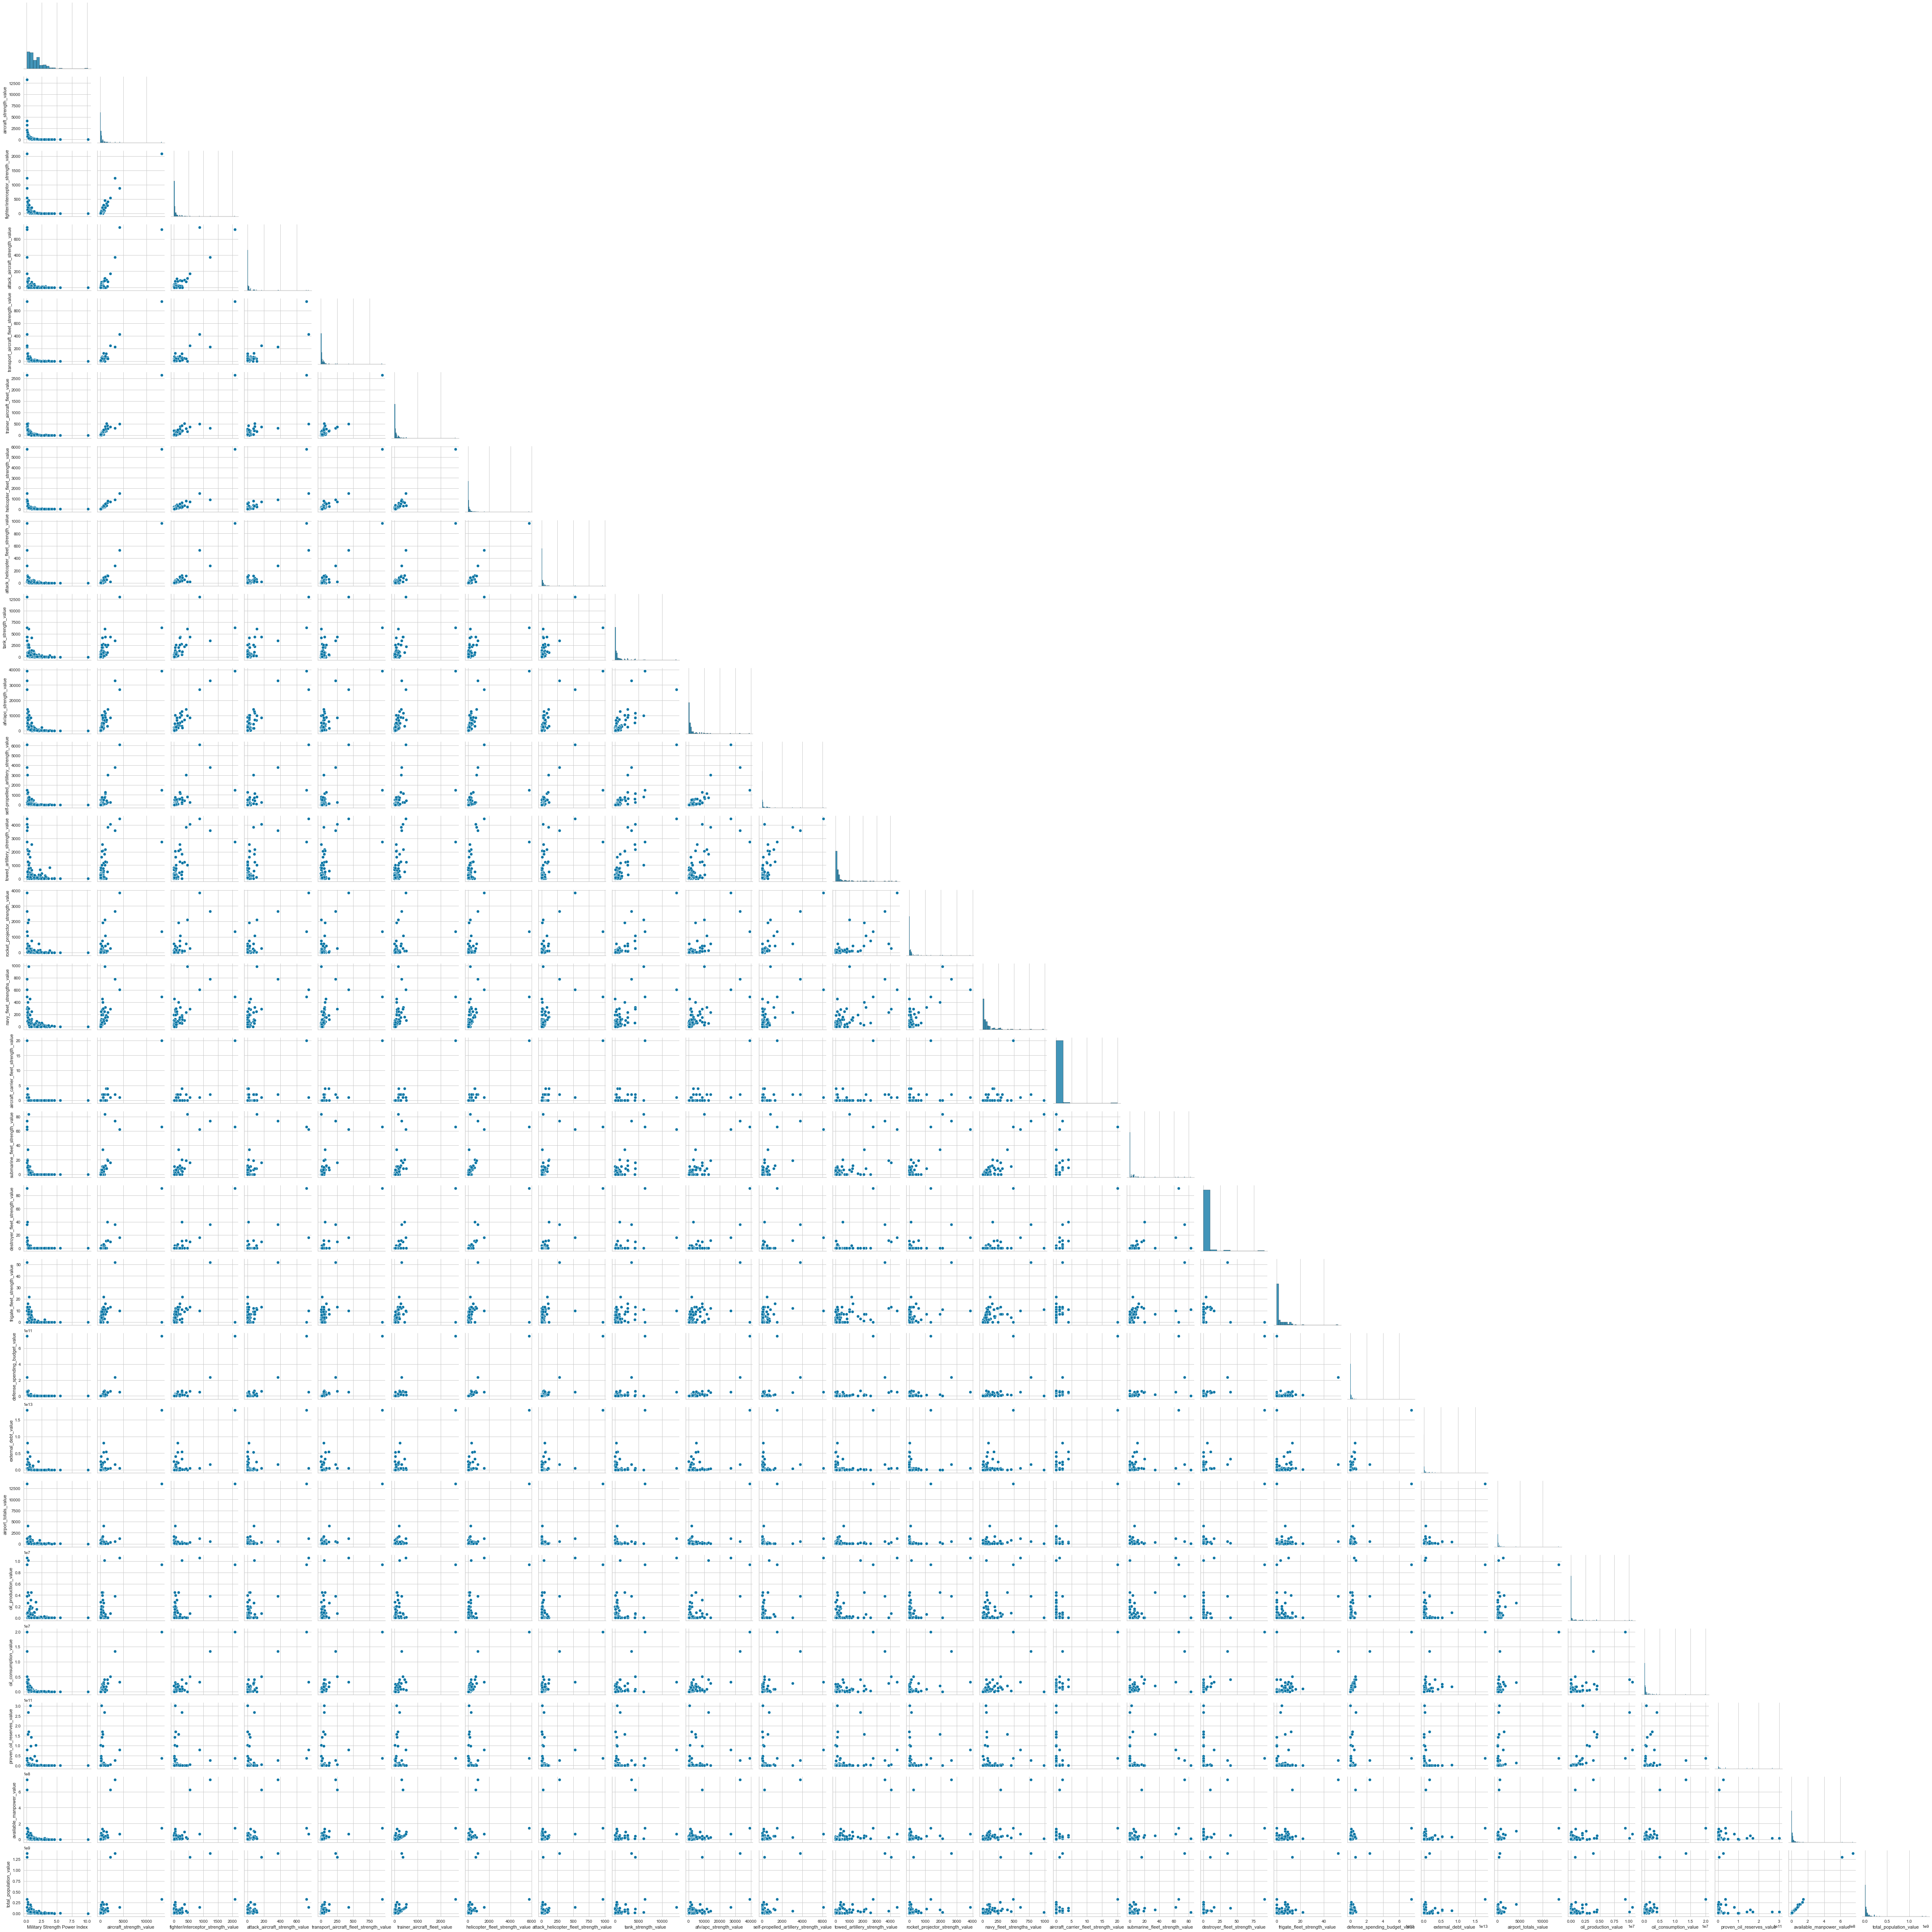

In [210]:
sns.pairplot(value_df, palette="inferno", corner=True);

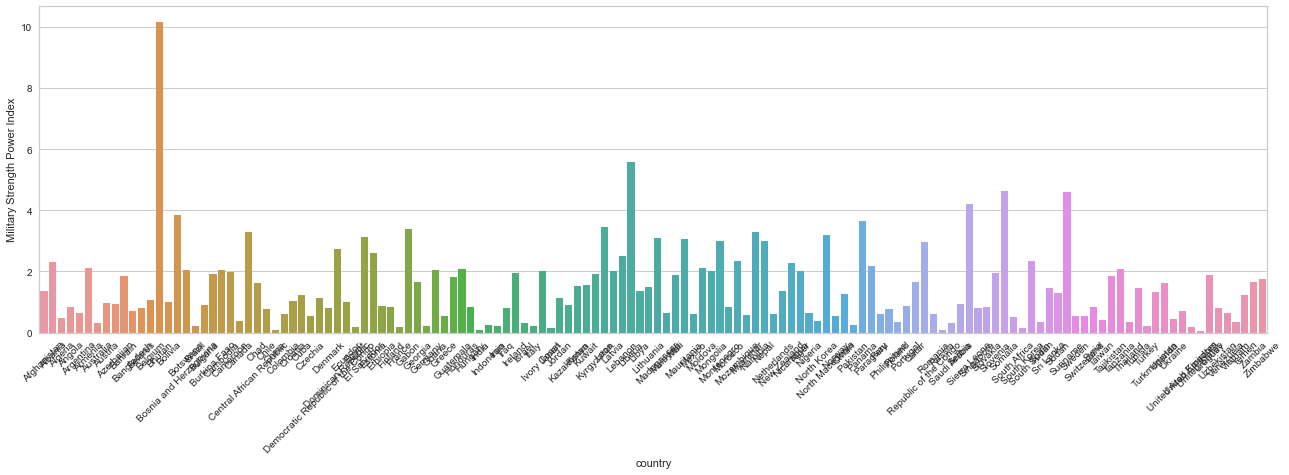

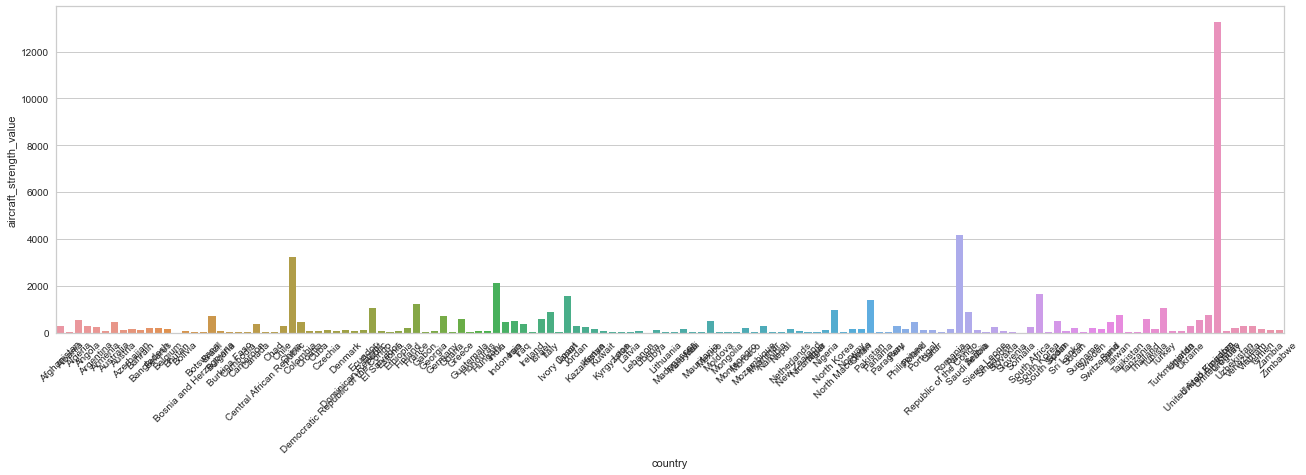

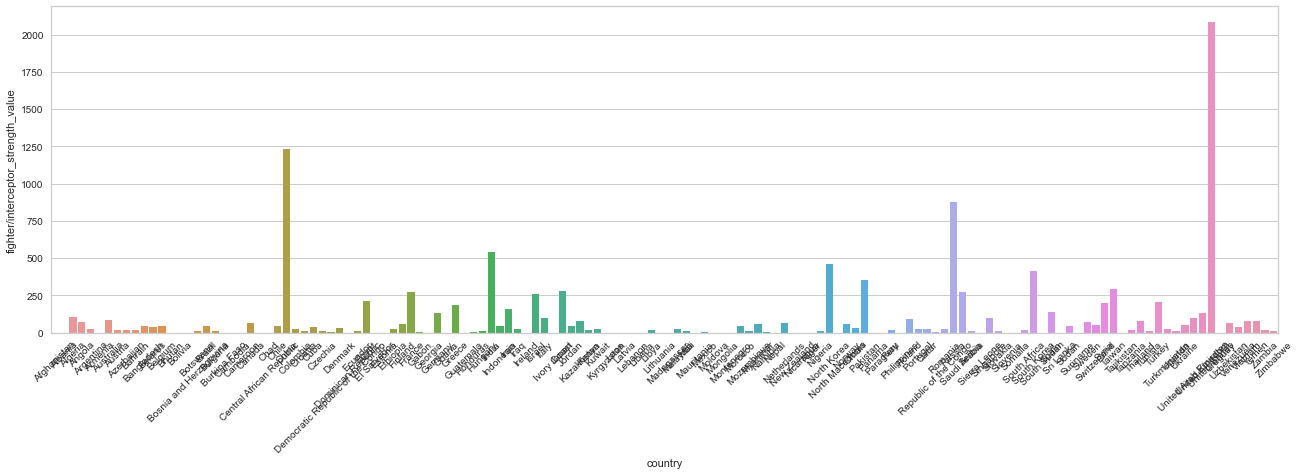

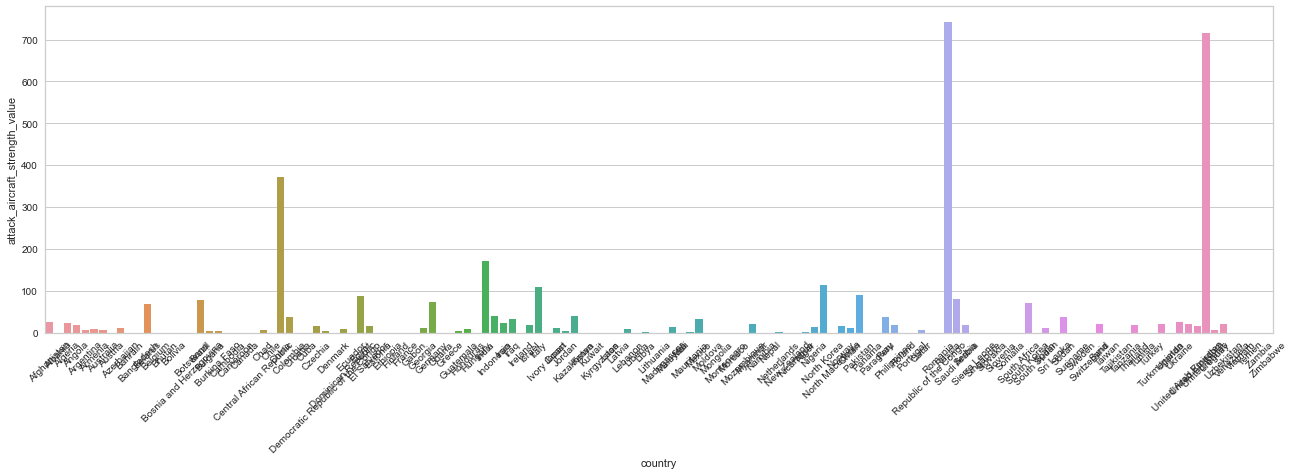

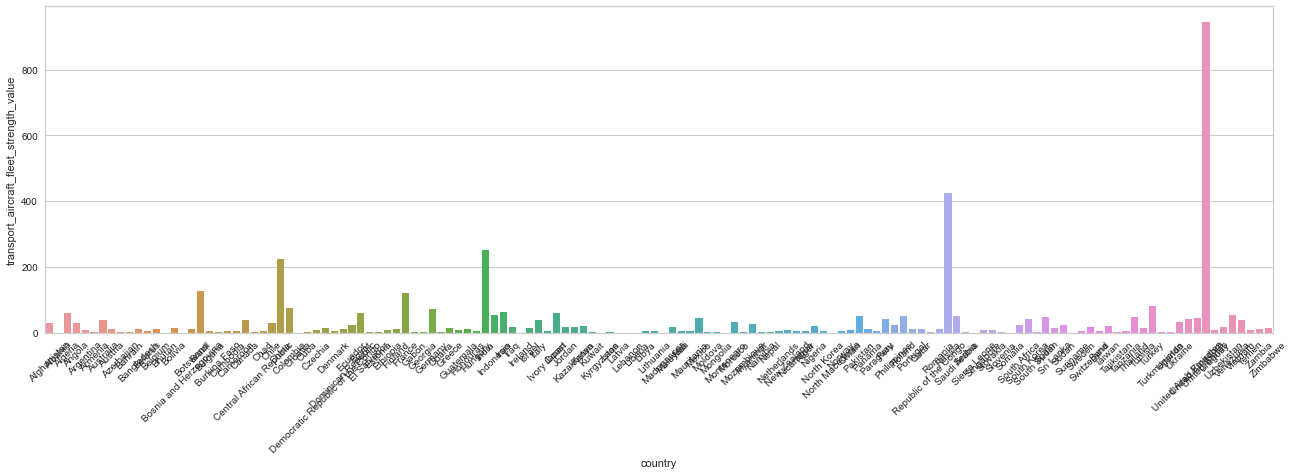

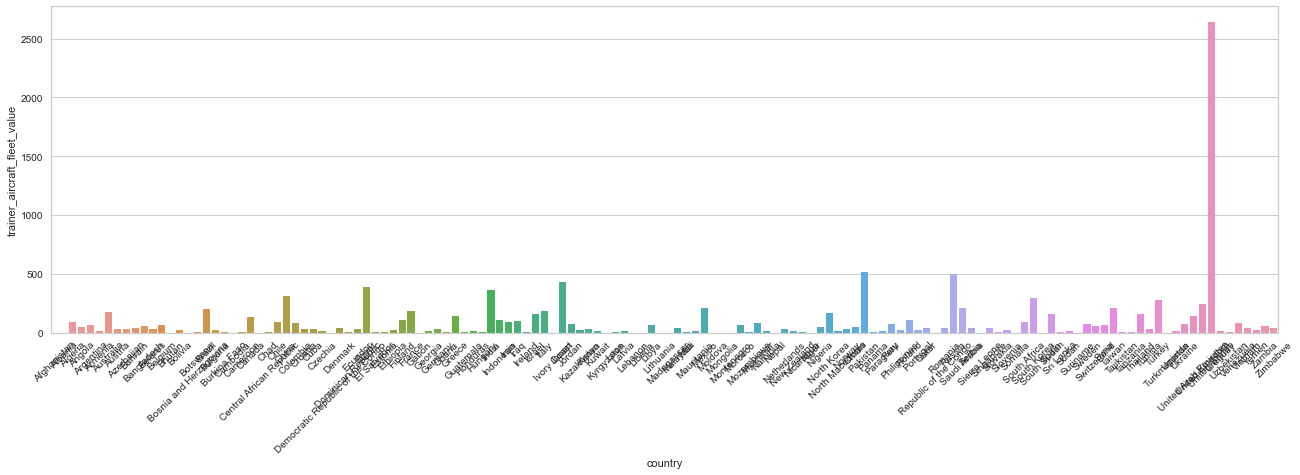

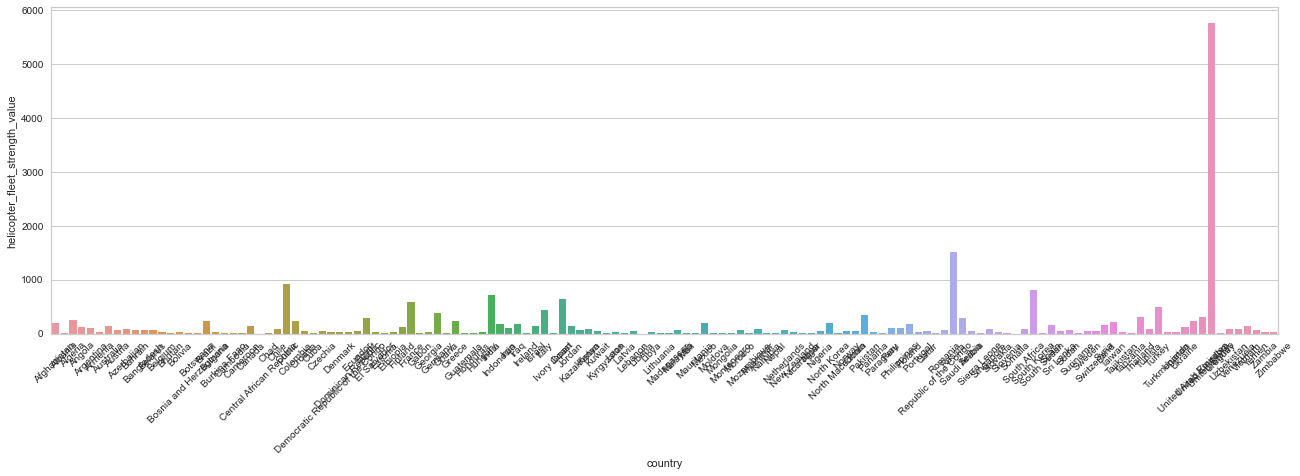

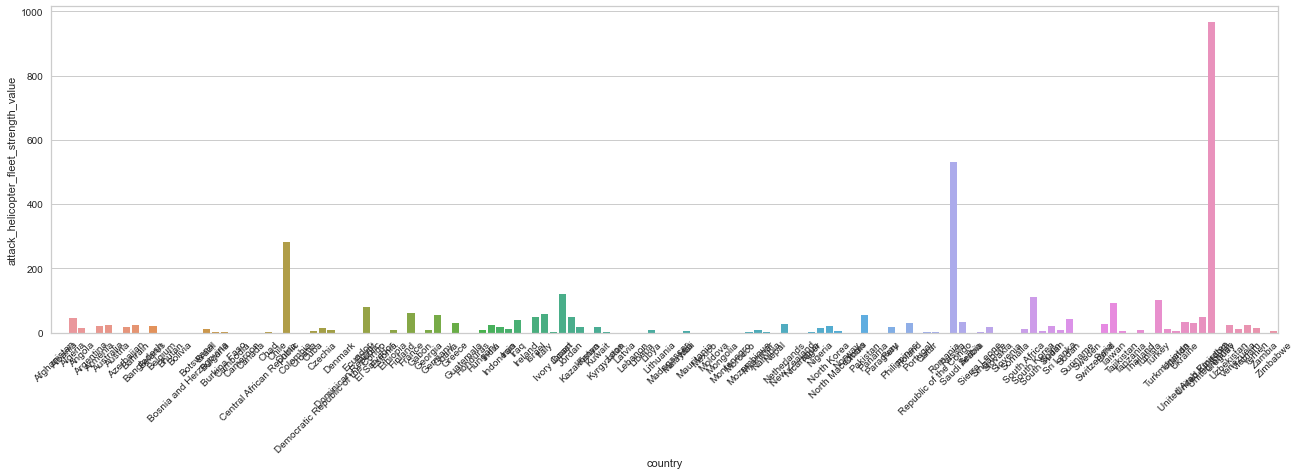

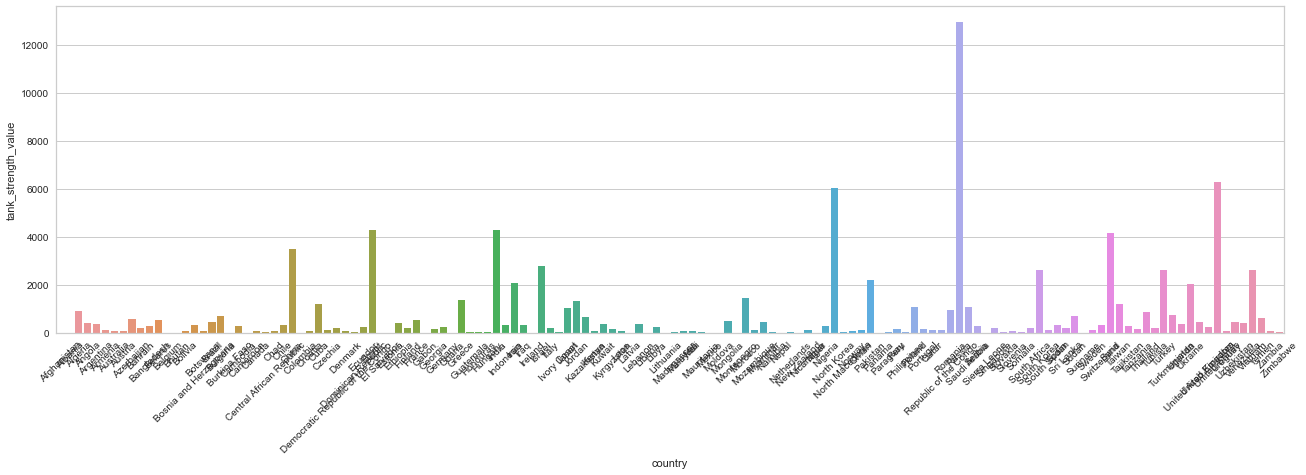

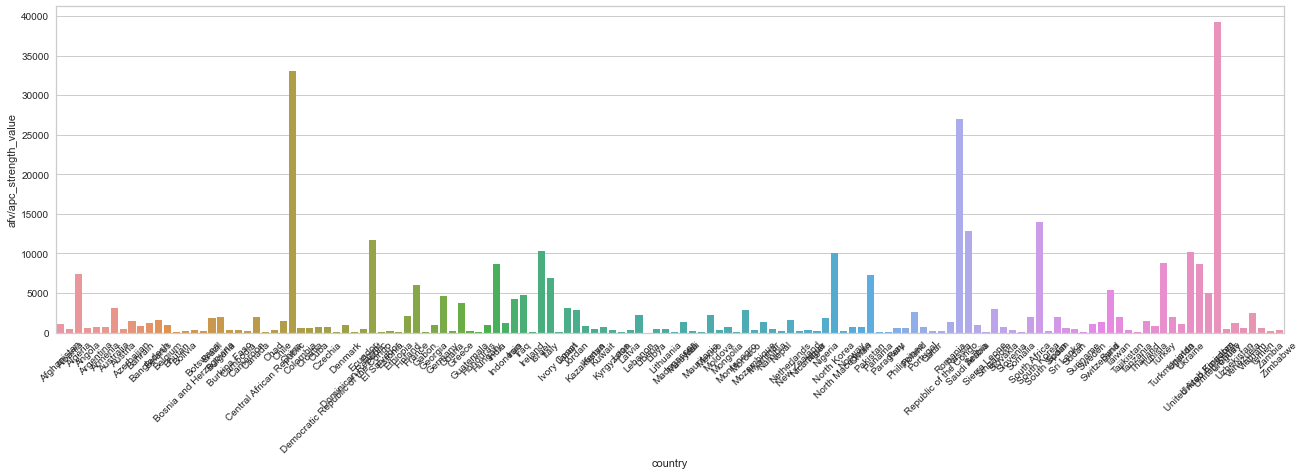

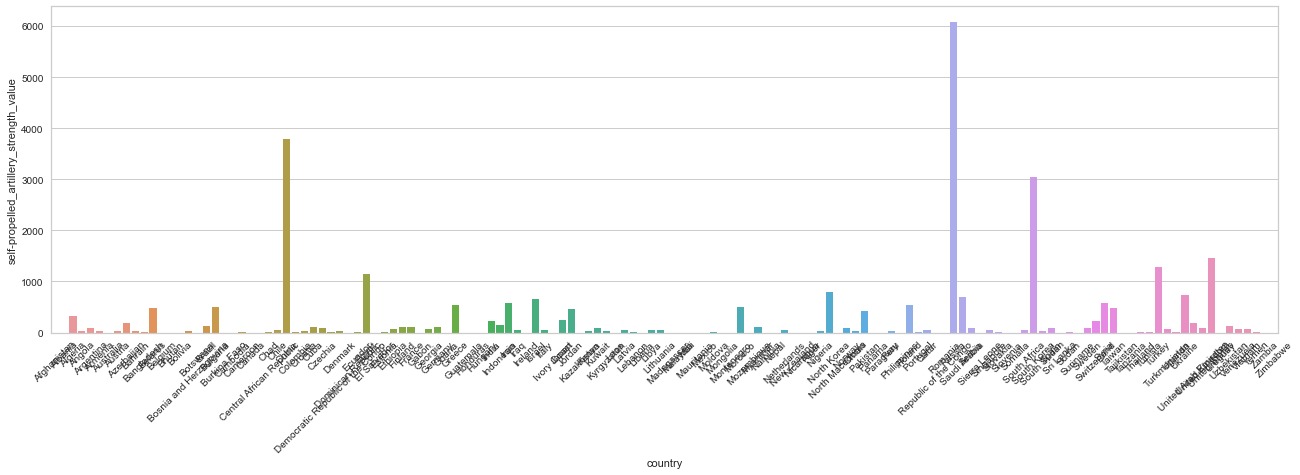

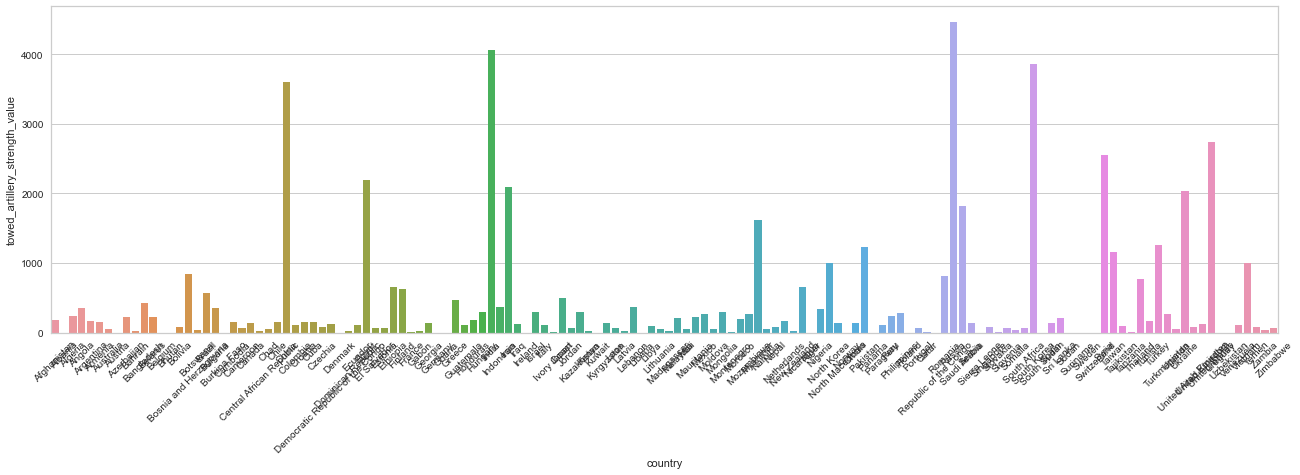

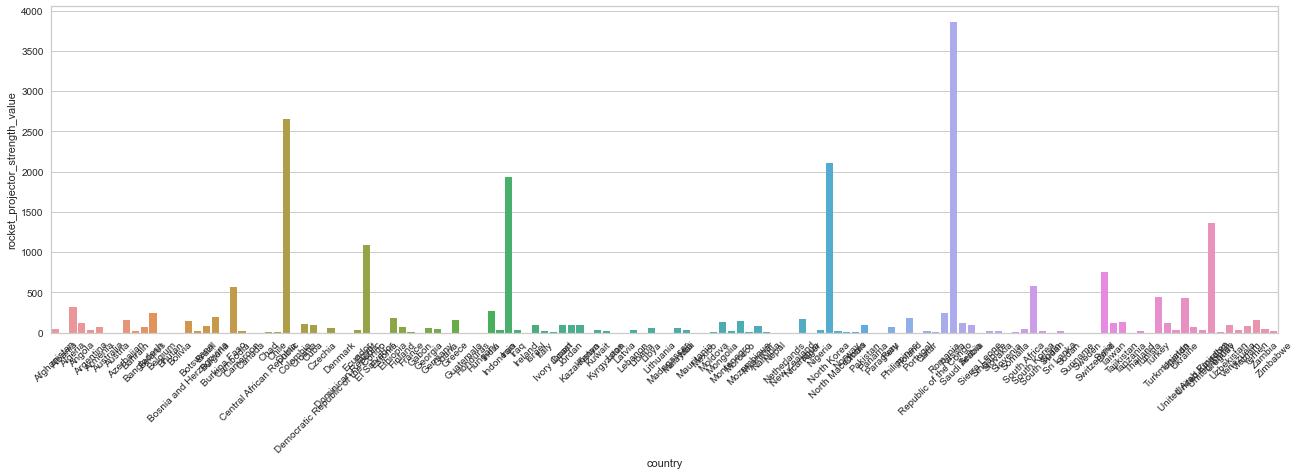

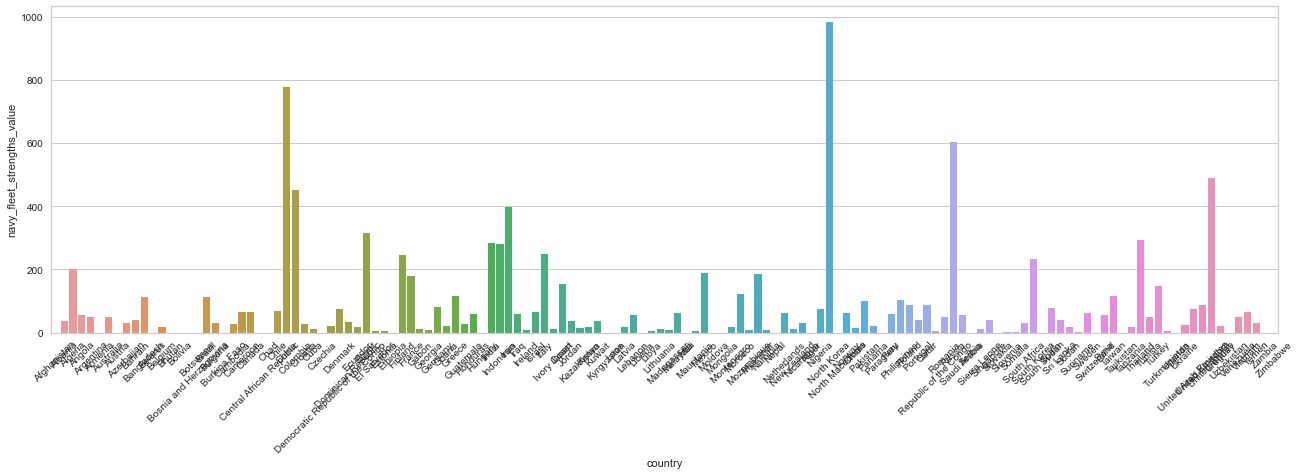

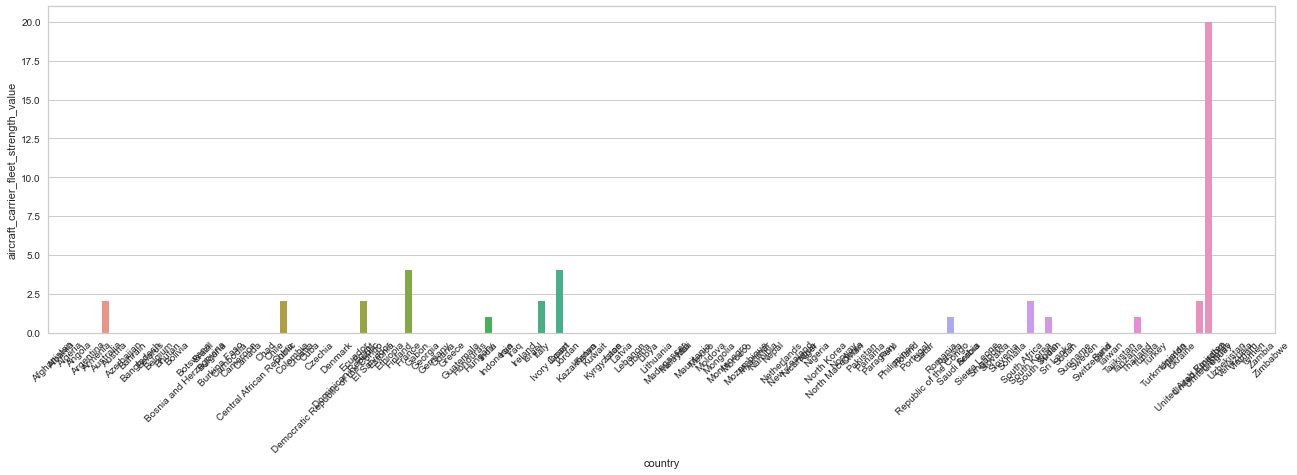

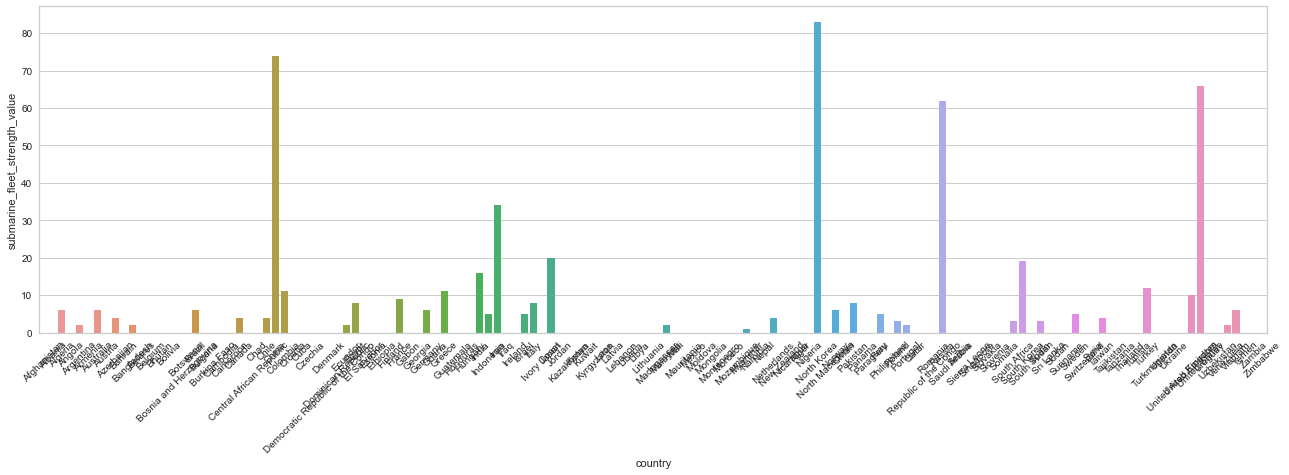

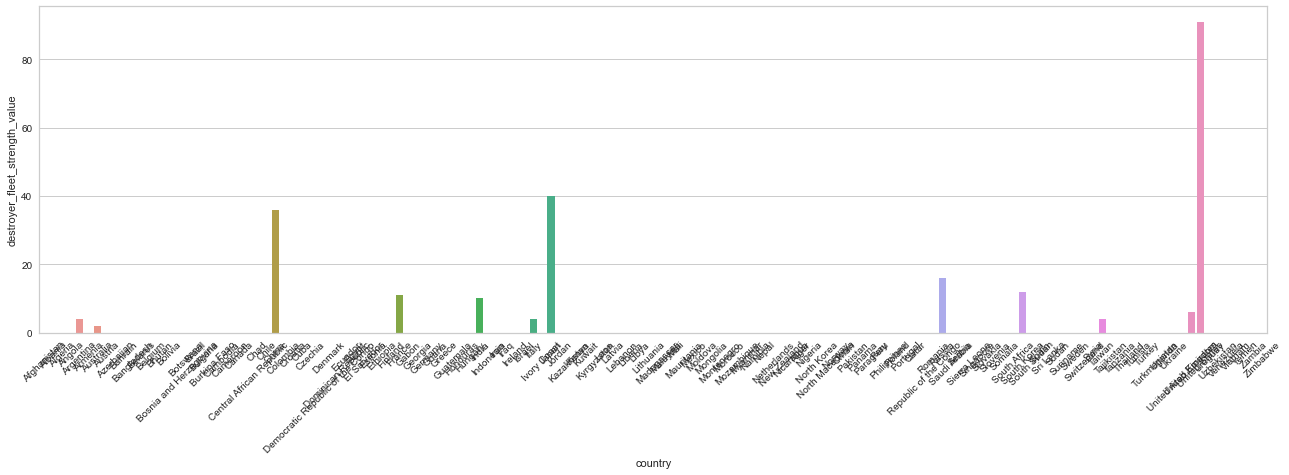

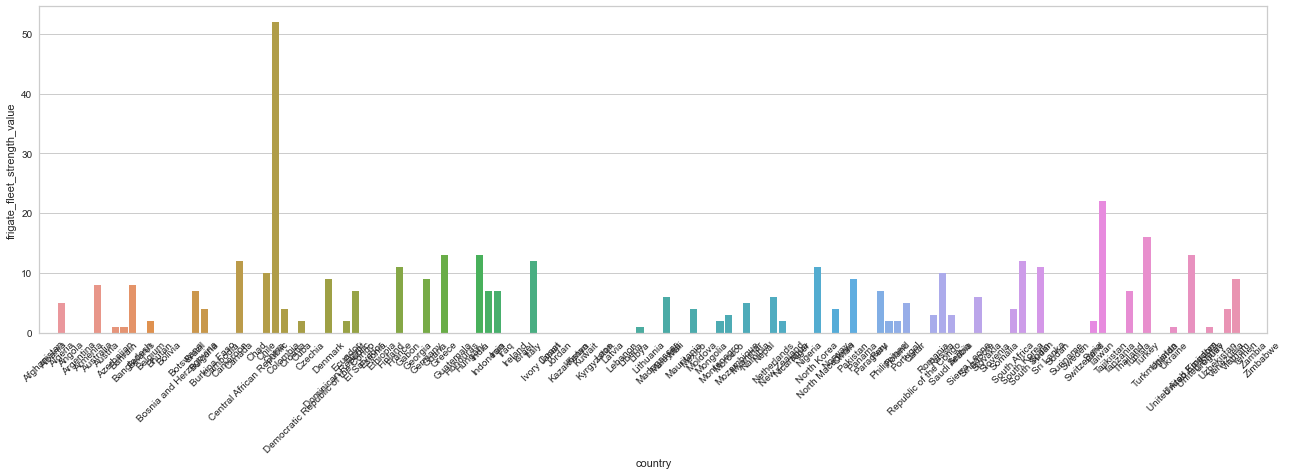

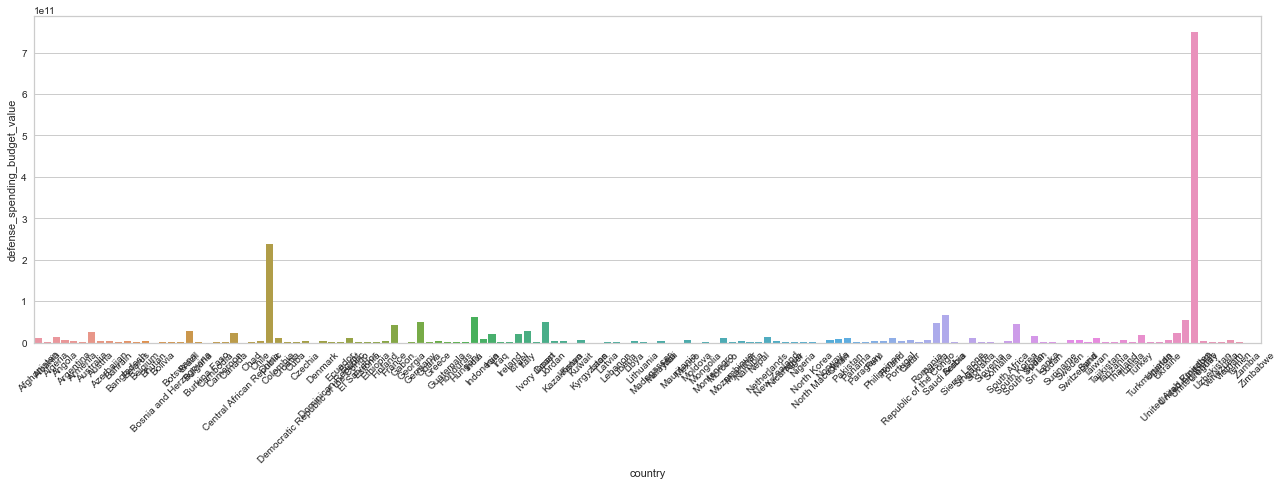

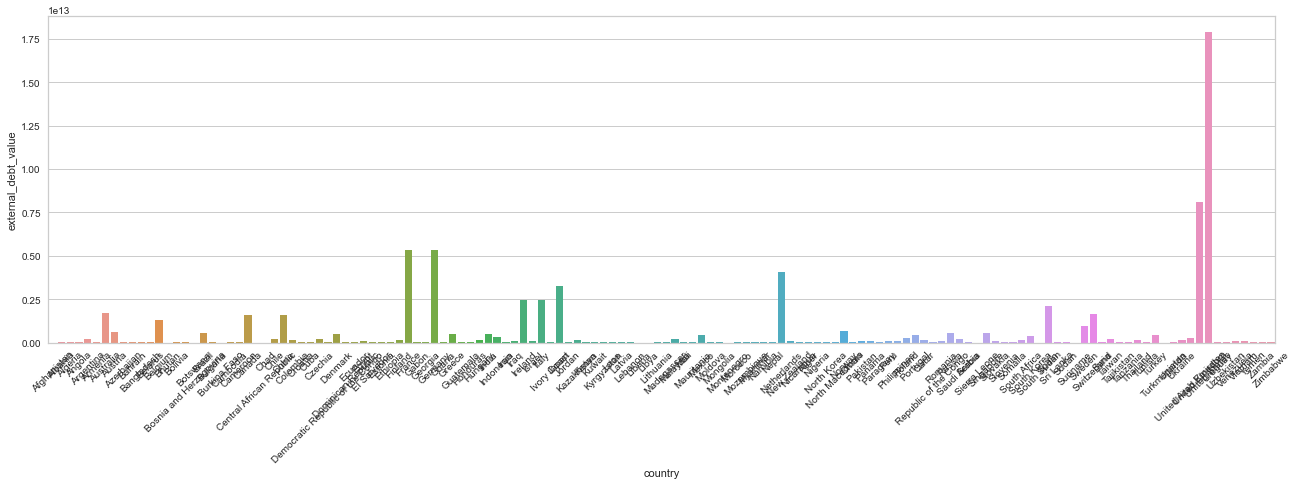

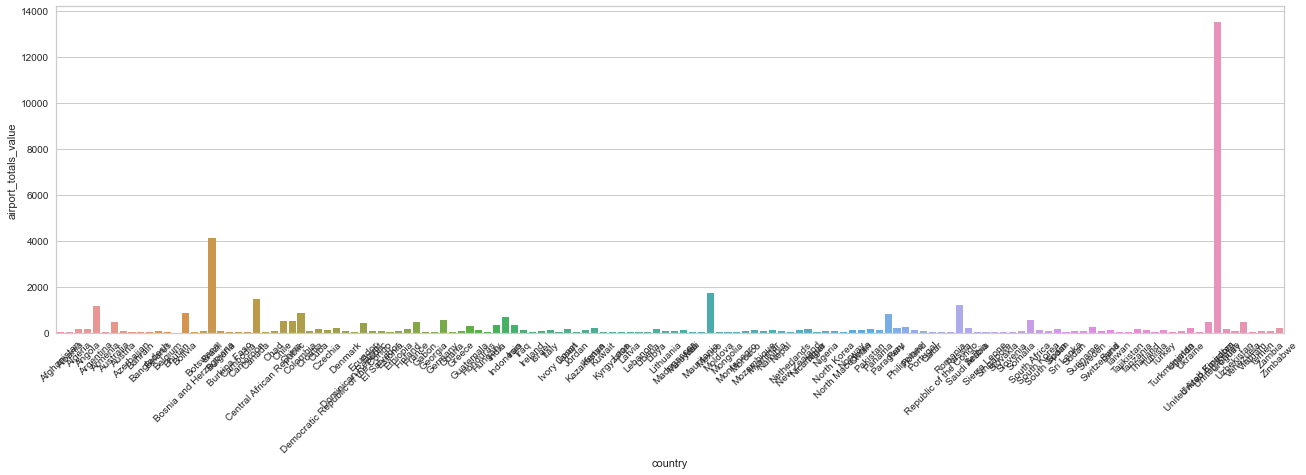

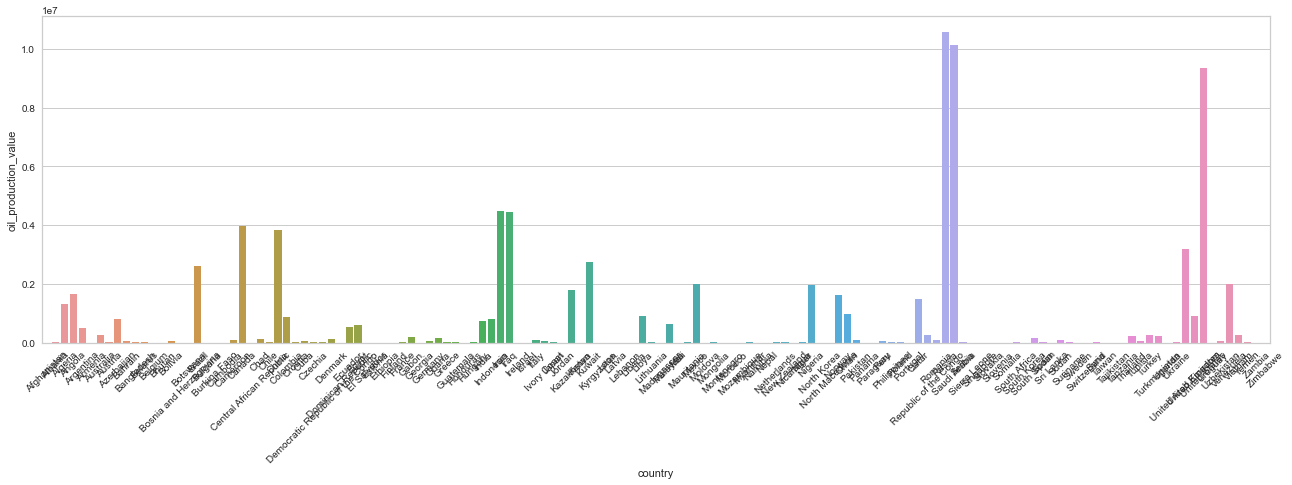

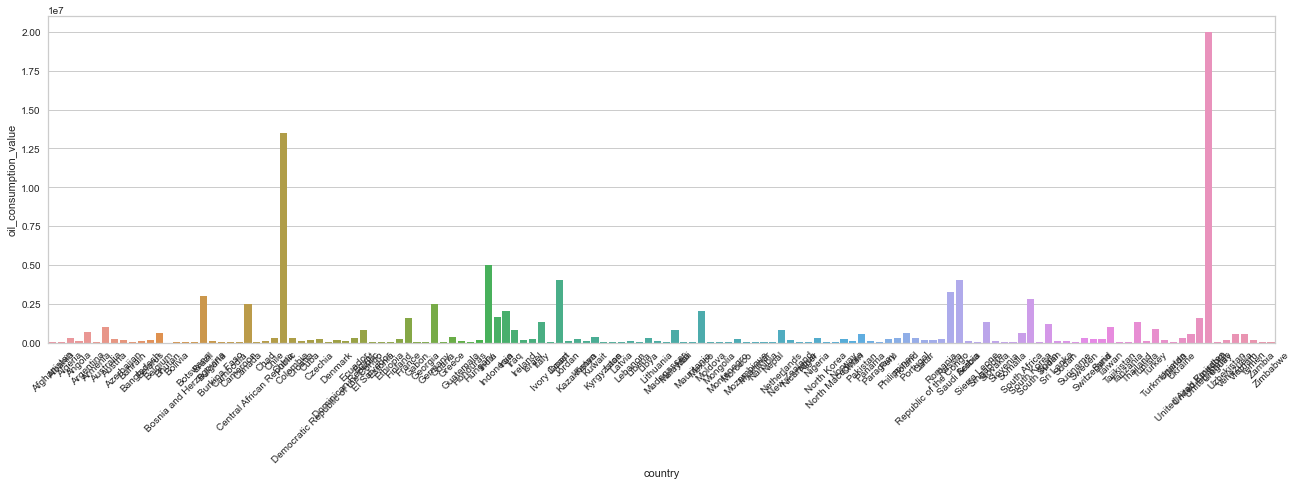

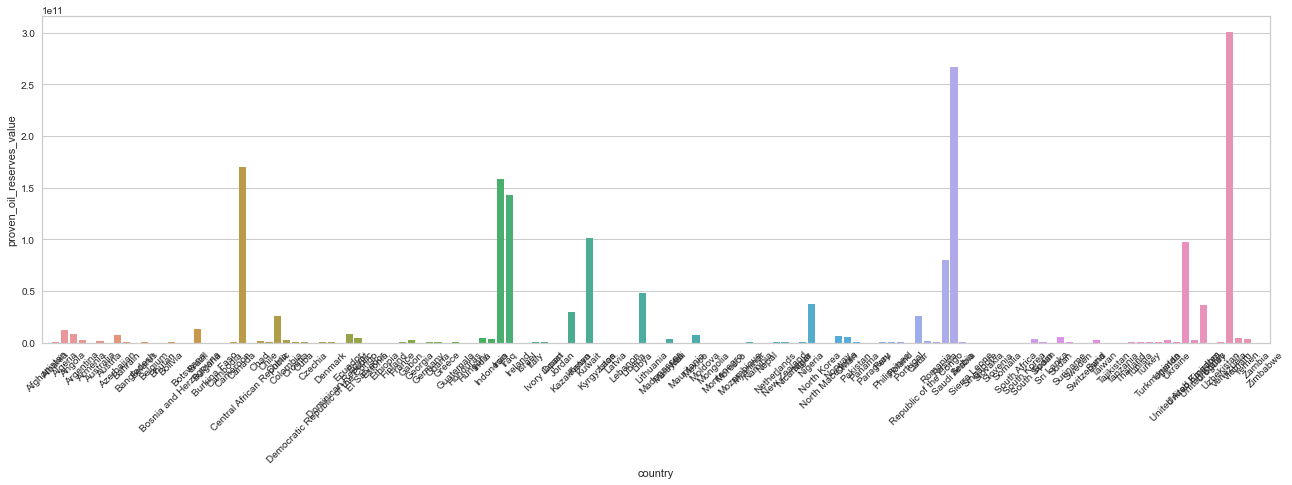

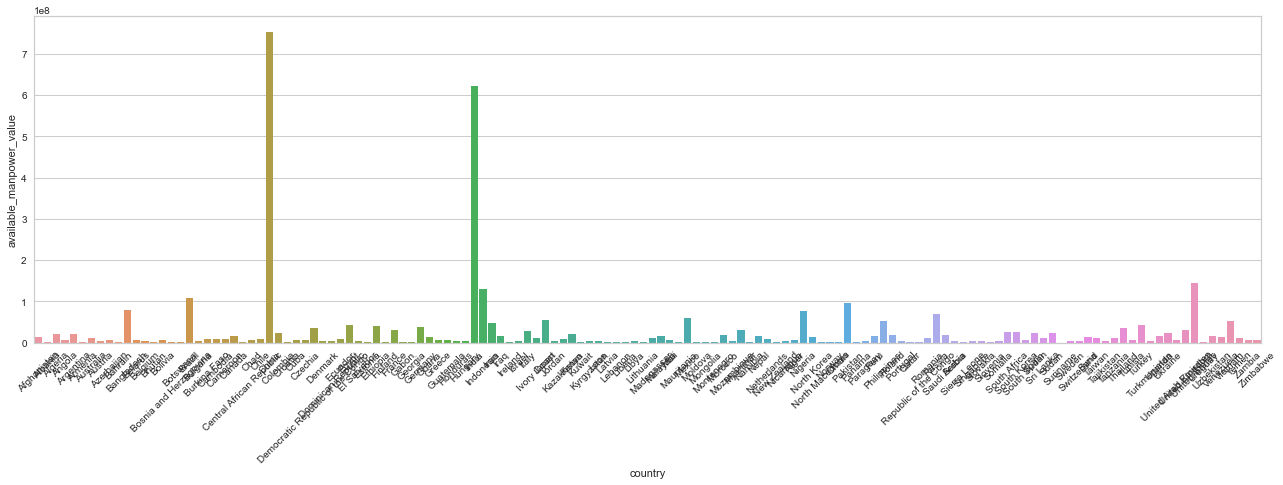

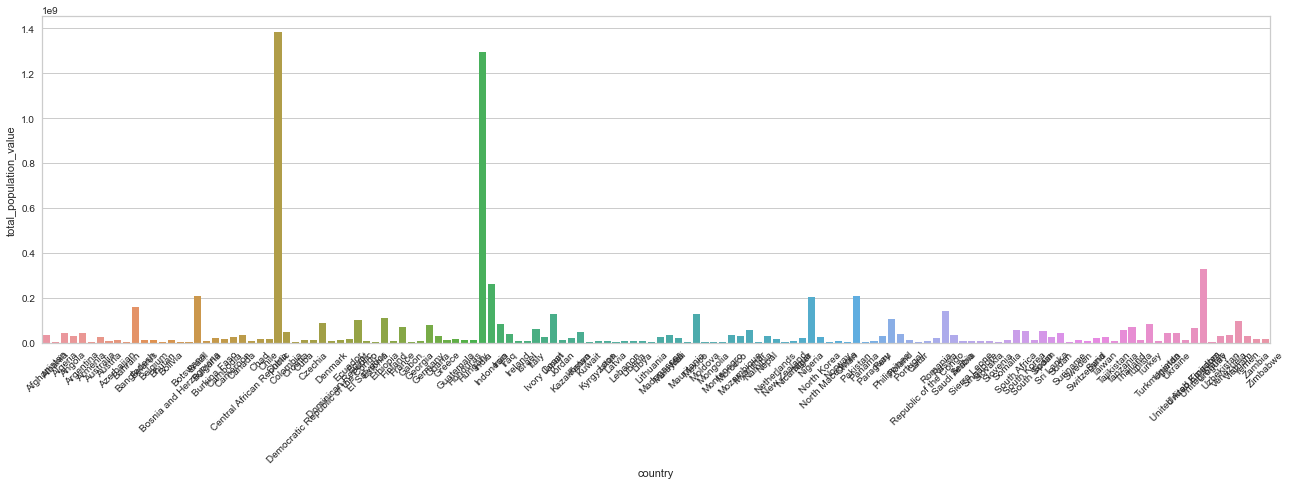

In [211]:
for col in value_df.columns:
    plt.figure(figsize = (22,6))
    sns.barplot(y = value_df[col], x = value_df.index, data = value_df)
    plt.xticks(rotation = 45);

In [212]:
value_df.iplot(kind='hist');

In [213]:
for i in value_df:
    value_df[i].iplot(kind="box", title=i, boxpoints="all", color='lightseagreen')

In [214]:
fig = px.imshow(value_df.corr(), aspect='auto')
fig.show()

## Decriptive statistics

In [215]:
value_df.describe().T.style.background_gradient(subset=['mean','std','50%','count'], cmap='RdPu')

# Data Preprocessing

In [216]:
value_df.head()


Military Strength Power Index  aircraft_strength_value  \
country                                                               
Afghanistan                          1.344                  260.000   
Albania                              2.314                   19.000   
Algeria                              0.466                  551.000   
Angola                               0.838                  295.000   
Argentina                            0.652                  227.000   

             fighter/interceptor_strength_value  \
country                                           
Afghanistan                               0.000   
Albania                                   0.000   
Algeria                                 103.000   
Angola                                   72.000   
Argentina                                24.000   

             attack_aircraft_strength_value  \
country                                       
Afghanistan                          25.000   
Albania                               0.000   
Algeria                              22.000   
Angola                               18.000   
Argentina                             7.000   

             transport_aircraft_fleet_strength_value  \
country                                                
Afghanistan                                   30.000   
Albania                                        0.000   
Algeria                                       59.000   
Angola                                        30.000   
Argentina                                      9.000   

             trainer_aircraft_fleet_value  helicopter_fleet_strength_value  \
country                                                                      
Afghanistan                         0.000                          187.000   
Albania                             0.000                           19.000   
Algeria                            87.000                          257.000   
Angola                             47.000                          126.000   
Argentina                          64.000                          100.000   

             attack_helicopter_fleet_strength_value  tank_strength_value  \
country                                                                    
Afghanistan                                   0.000                0.000   
Albania                                       0.000                0.000   
Algeria                                      45.000              880.000   
Angola                                       15.000              379.000   
Argentina                                     0.000              370.000   

             afv/apc_strength_value  self-propelled_artillery_strength_value  \
country                                                                        
Afghanistan                1062.000                                    0.000   
Albania                     467.000                                    0.000   
Algeria                    7361.000                                  320.000   
Angola                      595.000                                   28.000   
Argentina                   739.000                                   83.000   

             towed_artillery_strength_value  rocket_projector_strength_value  \
country                                                                        
Afghanistan                         176.000                           50.000   
Albania                               0.000                            0.000   
Algeria                             240.000                          316.000   
Angola                              357.000                          115.000   
Argentina                           172.000                           26.000   

             navy_fleet_strengths_value  \
country                                   
Afghanistan                       0.000   
Albania                          38.000   
Algeria                         201.000   
Angola           

In [217]:
value_df.reset_index(inplace=True)

In [218]:
value_df.head()


country  Military Strength Power Index  aircraft_strength_value  \
0  Afghanistan                          1.344                  260.000   
1      Albania                          2.314                   19.000   
2      Algeria                          0.466                  551.000   
3       Angola                          0.838                  295.000   
4    Argentina                          0.652                  227.000   

   fighter/interceptor_strength_value  attack_aircraft_strength_value  \
0                               0.000                          25.000   
1                               0.000                           0.000   
2                             103.000                          22.000   
3                              72.000                          18.000   
4                              24.000                           7.000   

   transport_aircraft_fleet_strength_value  trainer_aircraft_fleet_value  \
0                                   30.000                         0.000   
1                                    0.000                         0.000   
2                                   59.000                        87.000   
3                                   30.000                        47.000   
4                                    9.000                        64.000   

   helicopter_fleet_strength_value  attack_helicopter_fleet_strength_value  \
0                          187.000                                   0.000   
1                           19.000                                   0.000   
2                          257.000                                  45.000   
3                          126.000                                  15.000   
4                          100.000                                   0.000   

   tank_strength_value  afv/apc_strength_value  \
0                0.000                1062.000   
1                0.000                 467.000   
2              880.000                7361.000   
3              379.000                 595.000   
4              370.000                 739.000   

   self-propelled_artillery_strength_value  towed_artillery_strength_value  \
0                                    0.000                         176.000   
1                                    0.000                           0.000   
2                                  320.000                         240.000   
3                                   28.000                         357.000   
4                                   83.000                         172.000   

   rocket_projector_strength_value  navy_fleet_strengths_value  \
0                           50.000                       0.000   
1                            0.000                      38.000   
2                          316.000                     201.000   
3                          115.000                      57.000   
4                           26.000                      49.000   

   aircraft_carrier_fleet_strength_value  submarine_fleet_strength_value  \
0                                  0.000                           0.000   
1                                  0.000                           0.000   
2                                  0.000                           6.000   
3                                  0.000                           0.000   
4                                  0.000                           2.000   

   destroyer_fleet_strength_value  frigate_fleet_strength_value  \
0                           0.000                         0.000   
1                           0.000                         0.000   
2                           0.000                         5.000   
3                           0.000                         0.000   
4                           4.000                         0.000   

   defense_spending_budget_value  external_debt_value  airport_totals_value  \
0                12000000000.000       2840000000.000                43.000   
1           

In [219]:
X = value_df.drop(["country"], axis=1)


In [220]:
X.head()


Military Strength Power Index  aircraft_strength_value  \
0                          1.344                  260.000   
1                          2.314                   19.000   
2                          0.466                  551.000   
3                          0.838                  295.000   
4                          0.652                  227.000   

   fighter/interceptor_strength_value  attack_aircraft_strength_value  \
0                               0.000                          25.000   
1                               0.000                           0.000   
2                             103.000                          22.000   
3                              72.000                          18.000   
4                              24.000                           7.000   

   transport_aircraft_fleet_strength_value  trainer_aircraft_fleet_value  \
0                                   30.000                         0.000   
1                                    0.000                         0.000   
2                                   59.000                        87.000   
3                                   30.000                        47.000   
4                                    9.000                        64.000   

   helicopter_fleet_strength_value  attack_helicopter_fleet_strength_value  \
0                          187.000                                   0.000   
1                           19.000                                   0.000   
2                          257.000                                  45.000   
3                          126.000                                  15.000   
4                          100.000                                   0.000   

   tank_strength_value  afv/apc_strength_value  \
0                0.000                1062.000   
1                0.000                 467.000   
2              880.000                7361.000   
3              379.000                 595.000   
4              370.000                 739.000   

   self-propelled_artillery_strength_value  towed_artillery_strength_value  \
0                                    0.000                         176.000   
1                                    0.000                           0.000   
2                                  320.000                         240.000   
3                                   28.000                         357.000   
4                                   83.000                         172.000   

   rocket_projector_strength_value  navy_fleet_strengths_value  \
0                           50.000                       0.000   
1                            0.000                      38.000   
2                          316.000                     201.000   
3                          115.000                      57.000   
4                           26.000                      49.000   

   aircraft_carrier_fleet_strength_value  submarine_fleet_strength_value  \
0                                  0.000                           0.000   
1                                  0.000                           0.000   
2                                  0.000                           6.000   
3                                  0.000                           0.000   
4                                  0.000                           2.000   

   destroyer_fleet_strength_value  frigate_fleet_strength_value  \
0                           0.000                         0.000   
1                           0.000                         0.000   
2                           0.000                         5.000   
3                           0.000                         0.000   
4                           4.000                         0.000   

   defense_spending_budget_value  external_debt_value  airport_totals_value  \
0                12000000000.000       2840000000.000                43.000   
1                  250000000.000       9505000000.000                 4.000   
2      

In [221]:
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler, scale
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
from sklearn.cluster import KMeans

In [222]:
scaler = scale

In [223]:
X_scaled = pd.DataFrame(scaler(X))


In [228]:
X_scaled.shape

(138, 26)

# Modelling

In [ ]:
K-Means

## Hopkins Test 
#### Assess the clusterability of a dataset. A score between 0 and 1, a score around 0.5 express no clusterability, a score tending to 1 express an uniform distrubution so clustering can't be useful and  0 express  not an uniform distrubution hence clusterering can be useful.

In [229]:
X_scaled1 = X_scaled.copy()
X_scaled2 = X_scaled.copy()
X_scaled3 = X_scaled.copy()

In [230]:
hopkins(scale(X_scaled1), X_scaled1.shape[0])

0.07446429263196426

In [231]:
hopkins(MinMaxScaler().fit_transform(X_scaled2), X_scaled2.shape[0])

0.081002157831538

In [232]:
hopkins(StandardScaler().fit_transform(X_scaled3), X_scaled3.shape[0])

0.07537974262763218

In [233]:
hopkins(scale(X_scaled1), X_scaled1.shape[0])

0.0754551587927956

## Clustering with K-means

In [234]:
K_means_model1 = KMeans(random_state = 101)

In [235]:
K_means_model1.fit_predict(X)

array([0, 0, 0, 0, 0, 0, 3, 6, 0, 0, 0, 0, 3, 0, 0, 0, 0, 6, 0, 0, 0, 0,
       3, 0, 0, 0, 3, 0, 0, 0, 0, 0, 6, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2,
       0, 6, 0, 0, 0, 6, 6, 0, 0, 7, 0, 7, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 6, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0,
       0, 6, 0, 0, 0, 0, 0, 0, 0, 6, 0, 0, 0, 6, 0, 0, 0, 6, 0, 0, 0, 0,
       6, 0, 7, 0, 0, 0, 6, 3, 0, 0, 0, 0, 0, 0, 6, 0, 0, 0, 0, 4, 1, 0,
       0, 0, 0, 0, 0, 0], dtype=int32)

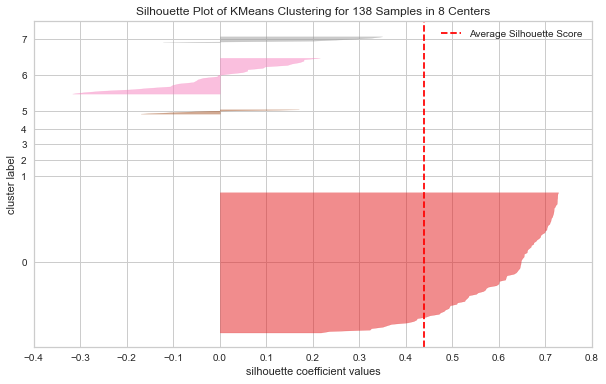

In [236]:
K_means_model1 = KMeans(n_clusters=8, random_state=101)
visualizer = SilhouetteVisualizer(K_means_model1)

visualizer.fit(X_scaled)    # Fit the data to the visualizer
visualizer.poof();

### Elbow Method 
### We use this method to find optimal k value by looking up to break point of graph. 

In [237]:
ssd = []

K = range(2, 11)

for k in K:
    model = KMeans(n_clusters=k, random_state=101)
    model.fit(X_scaled)
    ssd.append(model.inertia_)

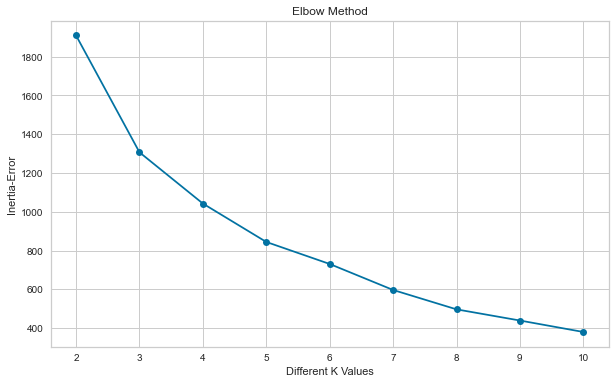

In [238]:
plt.plot(K, ssd, "bo-")
plt.xlabel("Different K Values")
plt.ylabel("Inertia-Error") 
plt.title("Elbow Method"); 

In [239]:
ssd # sum of squared distance

[1909.4825400661186,
 1306.8560688687044,
 1042.5482406933293,
 844.4899238963845,
 730.8877767638623,
 596.8408007852493,
 496.84526279155943,
 439.26125637046437,
 380.1863176605752]

In [240]:
pd.Series(ssd).diff()

0        NaN
1   -602.626
2   -264.308
3   -198.058
4   -113.602
5   -134.047
6    -99.996
7    -57.584
8    -59.075
dtype: float64

In [241]:
df1_diff =pd.DataFrame(-pd.Series(ssd).diff()).rename(index = lambda x : x+1)
df1_diff

0
1     NaN
2 602.626
3 264.308
4 198.058
5 113.602
6 134.047
7  99.996
8  57.584
9  59.075

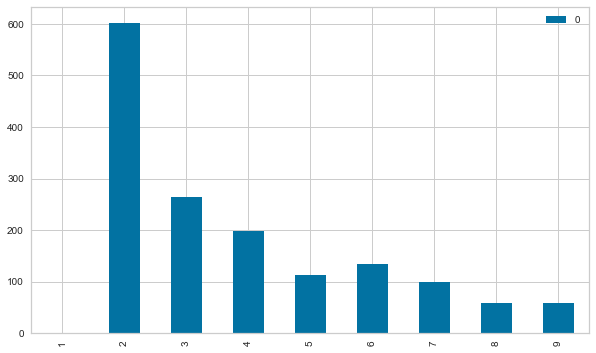

In [242]:
df1_diff.plot(kind='bar');

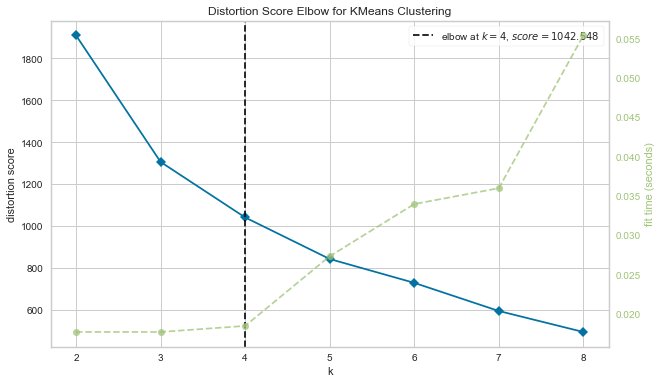

In [243]:
from yellowbrick.cluster import KElbowVisualizer

model_ = KMeans(random_state=101)
visualizer = KElbowVisualizer(model_, k=(2, 9))

visualizer.fit(X_scaled)        # Fit the data to the visualizer
visualizer.show();

### Model Building and label visualisation

In [244]:
K_means_model2 = KMeans(n_clusters = 4, random_state = 101)

K_means_model2.fit_predict(X_scaled)

array([1, 1, 3, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1,
       3, 1, 1, 1, 0, 3, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 3, 1, 1, 3,
       1, 3, 1, 1, 1, 0, 3, 3, 3, 1, 3, 3, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 3,
       1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 3, 1, 1, 1, 1, 1, 1, 1,
       3, 1, 3, 1, 1, 1, 1, 1, 3, 3, 1, 1, 3, 1, 3, 1, 1, 3, 3, 3, 2, 1,
       1, 3, 3, 1, 1, 1], dtype=int32)

In [245]:
K_means_model2.labels_

array([1, 1, 3, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1,
       3, 1, 1, 1, 0, 3, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 3, 1, 1, 3,
       1, 3, 1, 1, 1, 0, 3, 3, 3, 1, 3, 3, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 3,
       1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 3, 1, 1, 1, 1, 1, 1, 1,
       3, 1, 3, 1, 1, 1, 1, 1, 3, 3, 1, 1, 3, 1, 3, 1, 1, 3, 3, 3, 2, 1,
       1, 3, 3, 1, 1, 1], dtype=int32)

In [246]:
K_means_model2.inertia_

1042.5482406933293

In [247]:
value_df["K-Means_cluster"] = K_means_model2.labels_

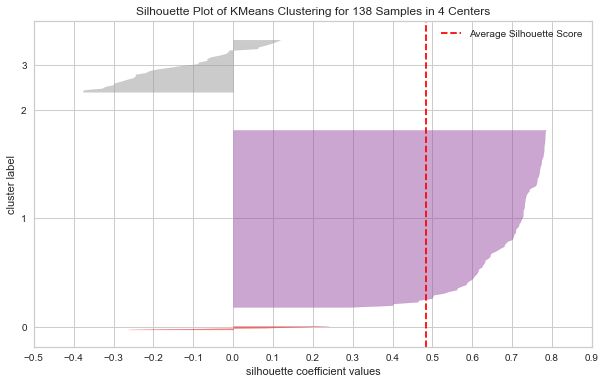

In [248]:
K_means_model2 = KMeans(n_clusters=4, random_state=101)
visualizer = SilhouetteVisualizer(K_means_model2)

visualizer.fit(X_scaled)    # Fit the data to the visualizer
visualizer.poof();

In [249]:
value_df["K-Means_cluster"].value_counts()

1    103
3     31
0      3
2      1
Name: K-Means_cluster, dtype: int64

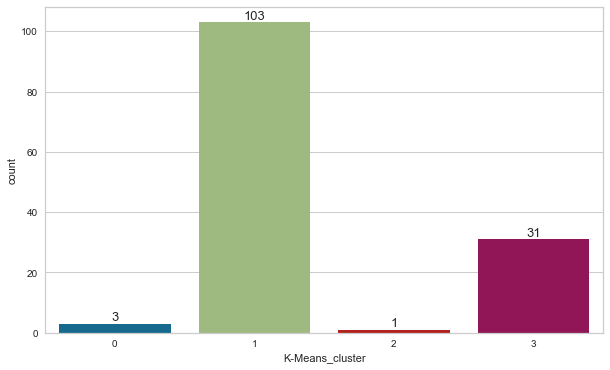

In [250]:
value_df["K-Means_cluster"].value_counts()

sns.countplot(x=value_df["K-Means_cluster"], data=value_df)

for index, value in enumerate(value_df["K-Means_cluster"].value_counts().sort_index()):
     plt.text(index, value, f"{value}", ha="center", va="bottom", fontsize = 13)

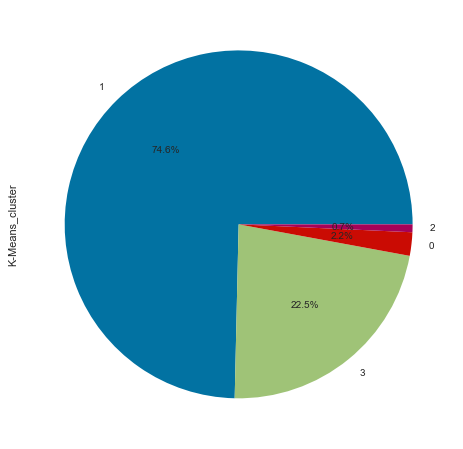

In [251]:
value_df["K-Means_cluster"].value_counts().plot(kind="pie", startangle=0, labeldistance=1.1, autopct='%1.1f%%',figsize=(10, 8));

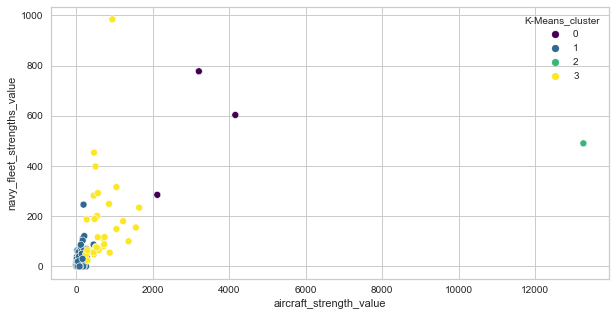

In [252]:
plt.figure(figsize=(10, 5))

sns.scatterplot(value_df["aircraft_strength_value"], 
                value_df["navy_fleet_strengths_value"], hue=value_df["K-Means_cluster"], palette= "viridis");

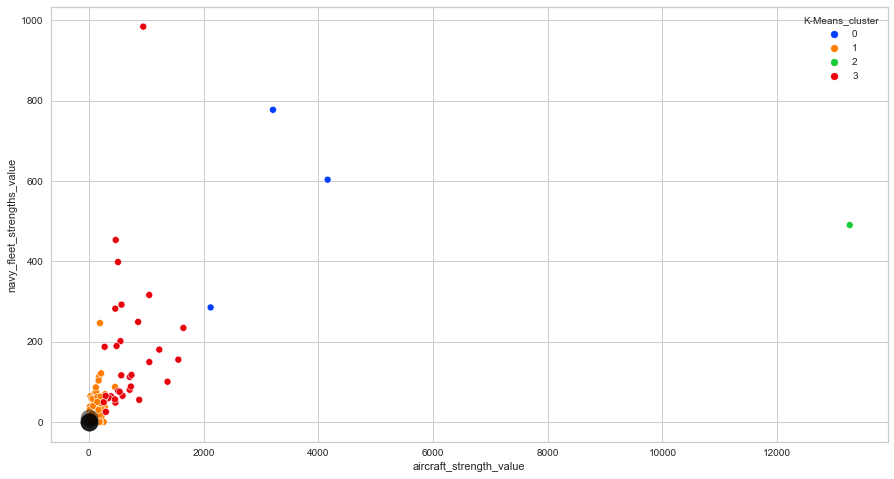

In [253]:
plt.figure(figsize=(15, 8))

sns.scatterplot(value_df["aircraft_strength_value"], 
                value_df["navy_fleet_strengths_value"], hue=value_df["K-Means_cluster"], data=value_df["K-Means_cluster"], palette="bright")

centers = K_means_model2.cluster_centers_
plt.scatter(centers[:, 2], centers[:, 14], c='black', s=300, alpha=0.5);

In [254]:
fig = px.scatter_3d(x=value_df["aircraft_strength_value"],
                   y=value_df["defense_spending_budget_value"],
                   z=value_df["external_debt_value"],
                   color=value_df["K-Means_cluster"],
                   labels = {"x": "aircraft_strength_value",
                             "y": "defense_spending_budget_value",
                             "z": "external_debt_value"},
                   hover_name=value_df["country"])

fig.show()

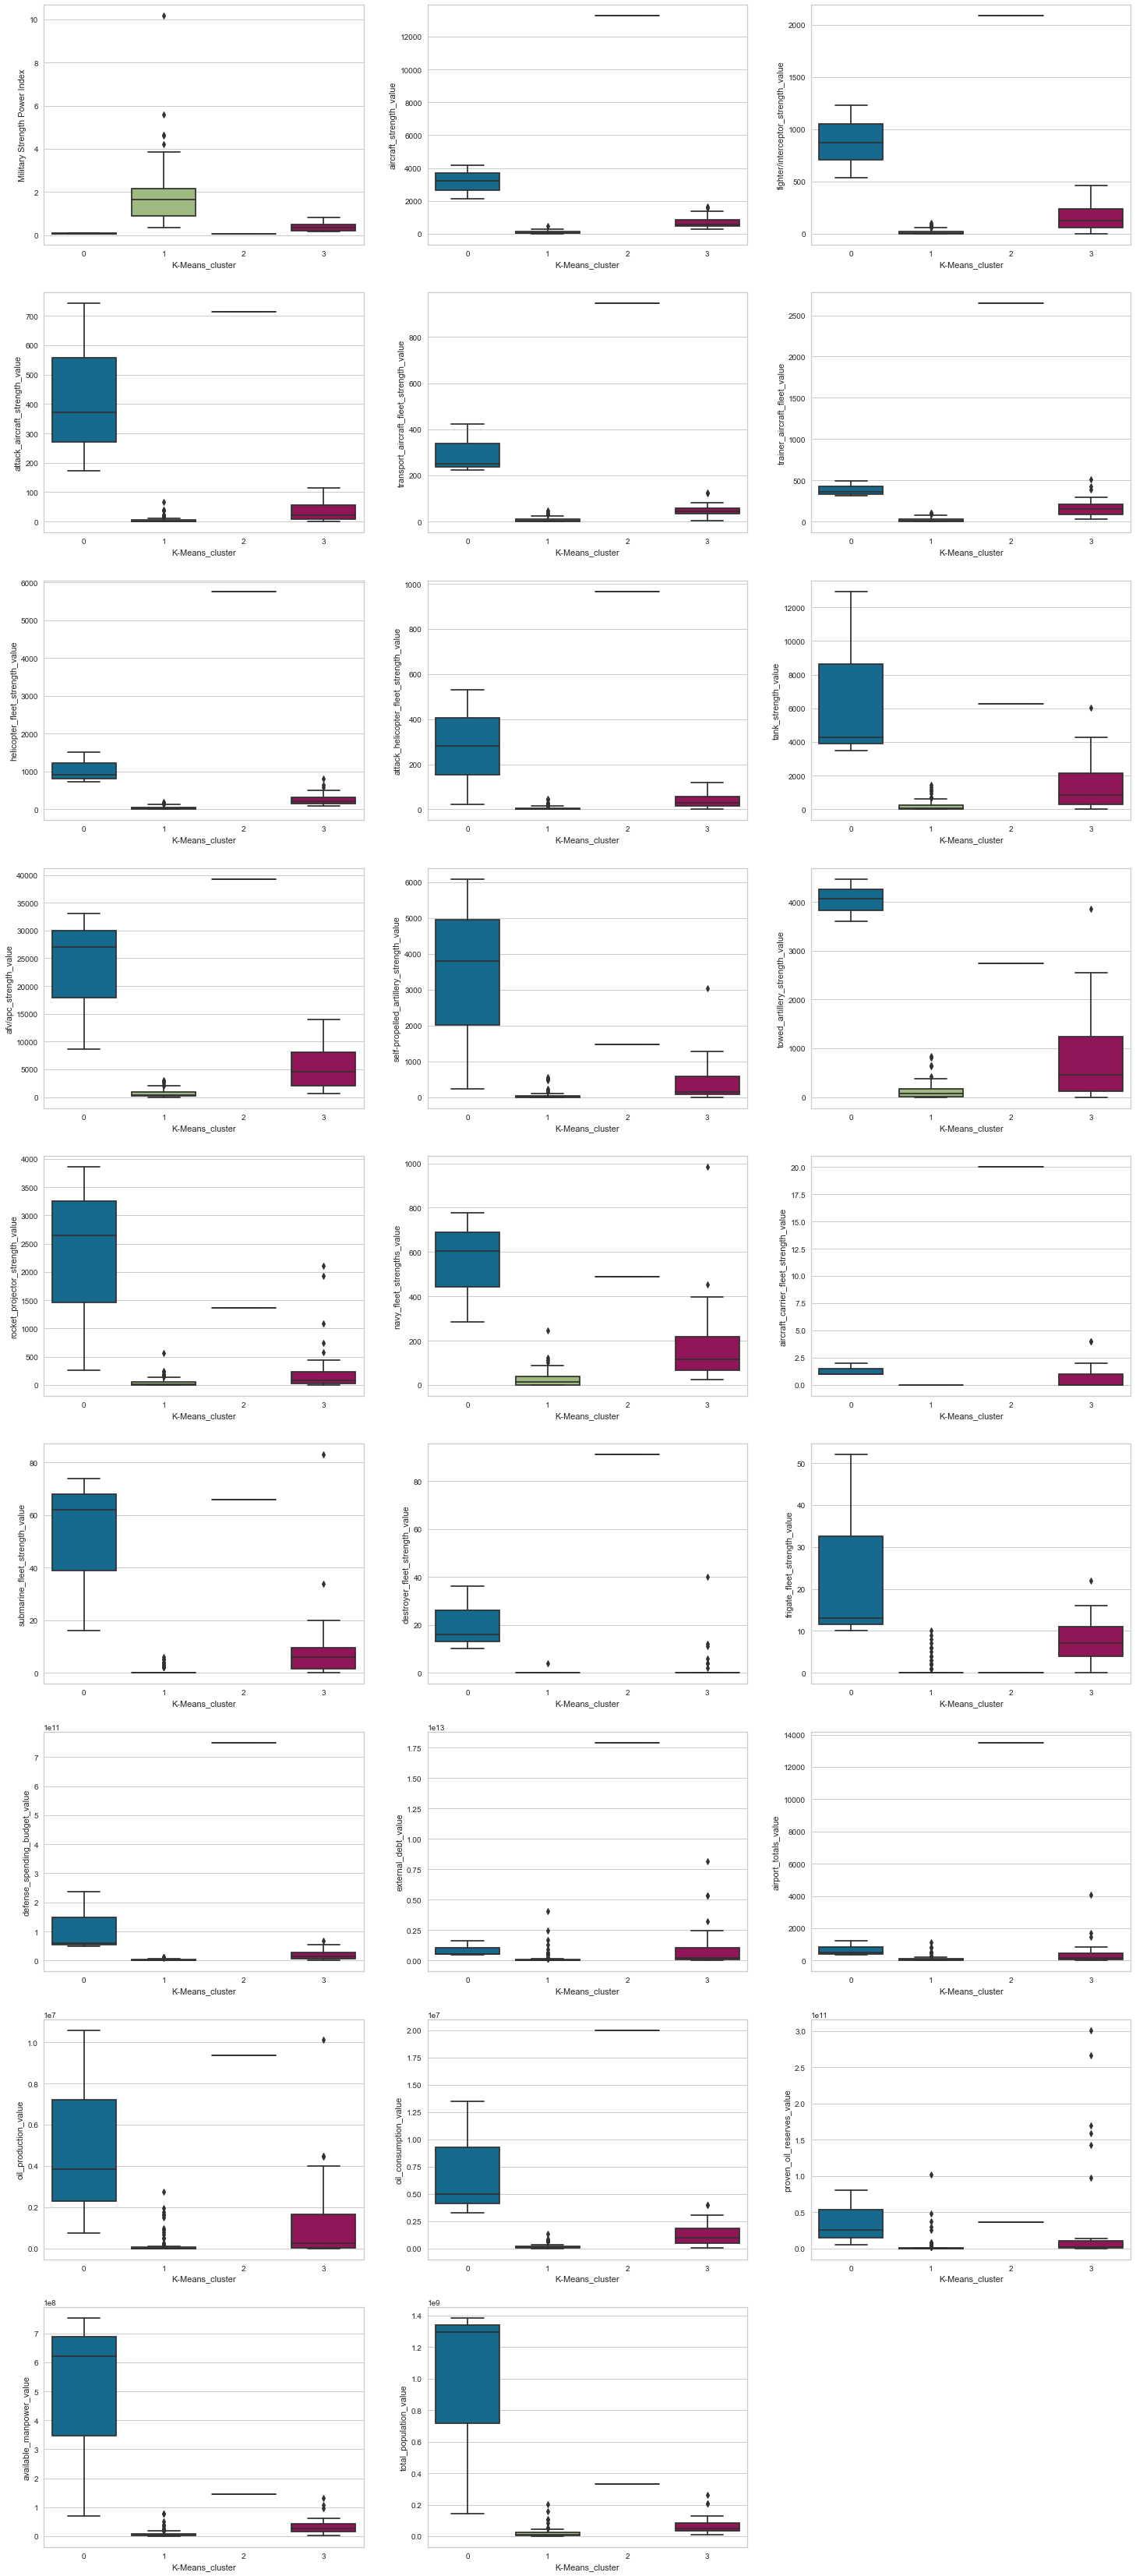

In [255]:
index = 0
plt.figure(figsize=(25, 60))

for feature in value_df.drop("country", axis=1):
    if feature != "K-Means_cluster":
        index += 1
        plt.subplot(9, 3, index)
        sns.boxplot(x="K-Means_cluster", y=feature, data=value_df)

In [256]:
value_df[value_df["K-Means_cluster"] == 0][["country", "Military Strength Power Index"]].sort_values(by="Military Strength Power Index")

country  Military Strength Power Index
101  Russia                          0.068
26    China                          0.069
49    India                          0.095

In [257]:
value_df[value_df["K-Means_cluster"] == 1][["country", "Military Strength Power Index"]].sort_values(by="Military Strength Power Index")

country  Military Strength Power Index
96                             Poland                          0.340
109                      South Africa                          0.498
117                       Switzerland                          0.526
89                             Norway                          0.528
116                            Sweden                          0.530
30                            Czechia                          0.553
82                        Netherlands                          0.592
100                           Romania                          0.618
94                               Peru                          0.622
86                            Nigeria                          0.648
4                           Argentina                          0.652
70                           Malaysia                          0.655
10                         Bangladesh                          0.707
25                              Chile                          0.767
95                        Philippines                          0.785
32                            Denmark                          0.788
105                         Singapore                          0.797
132                        Uzbekistan                          0.809
11                            Belarus                          0.818
48                            Hungary                          0.822
3                              Angola                          0.838
77                            Morocco                          0.841
106                          Slovakia                          0.847
39                            Finland                          0.850
38                           Ethiopia                          0.858
97                           Portugal                          0.861
18                           Bulgaria                          0.892
59                         Kazakhstan                          0.910
8                          Azerbaijan                          0.946
103                            Serbia                          0.948
7                             Austria                          0.957
14                            Bolivia                          0.994
34                            Ecuador                          1.006
28                            Croatia                          1.018
12                            Belgium                          1.050
31   Democratic Republic of the Congo                          1.139
58                             Jordan                          1.144
29                               Cuba                          1.221
135                             Yemen                          1.241
90                               Oman                          1.251
114                             Sudan                          1.302
125                      Turkmenistan                          1.329
0                         Afghanistan                          1.344
83                        New Zealand                          1.368
67                              Libya                          1.370
123                           Tunisia                          1.462
113                         Sri Lanka                          1.466
68                          Lithuania                          1.475
60                              Kenya                          1.529
61                             Kuwait                          1.570
126                            Uganda                          1.618
24                               Chad                          1.638
136                            Zambia                          1.646
42                            Georgia                          1.668
98                              Qatar                          1.670
137                          Zimbabwe                          1.758
46                          Guatemala                          1.830
9                           

In [258]:
value_df[value_df["K-Means_cluster"] == 2][["country", "Military Strength Power Index"]].sort_values(by="Military Strength Power Index")

country  Military Strength Power Index
130  United States                          0.061

In [260]:
value_df[value_df["K-Means_cluster"] == 3][["country", "Military Strength Power Index"]].sort_values(by="Military Strength Power Index")

country  Military Strength Power Index
57                  Japan                          0.150
110           South Korea                          0.151
40                 France                          0.170
129        United Kingdom                          0.172
35                  Egypt                          0.187
17                 Brazil                          0.199
124                Turkey                          0.210
55                  Italy                          0.211
43                Germany                          0.219
51                   Iran                          0.219
91               Pakistan                          0.236
50              Indonesia                          0.254
102          Saudi Arabia                          0.303
54                 Israel                          0.311
6               Australia                          0.323
112                 Spain                          0.339
134               Vietnam                          0.356
122              Thailand                          0.357
22                 Canada                          0.371
87            North Korea                          0.372
119                Taiwan                          0.401
127               Ukraine                          0.446
2                 Algeria                          0.466
45                 Greece                          0.531
79                Myanmar                          0.569
27               Colombia                          0.605
73                 Mexico                          0.607
133             Venezuela                          0.645
128  United Arab Emirates                          0.703
52                   Iraq                          0.791
118                 Syria                          0.824

In [261]:
print(f'Silhouette Score(n=4): {silhouette_score(X_scaled, value_df["K-Means_cluster"])}') # towards to 1 means, data good clustered by model

Silhouette Score(n=4): 0.48302104774861465


In [262]:
range_n_clusters = range(2, 9)

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, random_state=101)
    kmeans.fit(X_scaled)
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(X_scaled, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

For n_clusters=2, the silhouette score is 0.8644786857054572
For n_clusters=3, the silhouette score is 0.8021249852783661
For n_clusters=4, the silhouette score is 0.48302104774861465
For n_clusters=5, the silhouette score is 0.4972315934864139
For n_clusters=6, the silhouette score is 0.506094487500463
For n_clusters=7, the silhouette score is 0.48632074984250384
For n_clusters=8, the silhouette score is 0.4388267565700901


In [263]:
value_df.columns

Index(['country', 'Military Strength Power Index', 'aircraft_strength_value',
       'fighter/interceptor_strength_value', 'attack_aircraft_strength_value',
       'transport_aircraft_fleet_strength_value',
       'trainer_aircraft_fleet_value', 'helicopter_fleet_strength_value',
       'attack_helicopter_fleet_strength_value', 'tank_strength_value',
       'afv/apc_strength_value', 'self-propelled_artillery_strength_value',
       'towed_artillery_strength_value', 'rocket_projector_strength_value',
       'navy_fleet_strengths_value', 'aircraft_carrier_fleet_strength_value',
       'submarine_fleet_strength_value', 'destroyer_fleet_strength_value',
       'frigate_fleet_strength_value', 'defense_spending_budget_value',
       'external_debt_value', 'airport_totals_value', 'oil_production_value',
       'oil_consumption_value', 'proven_oil_reserves_value',
       'available_manpower_value', 'total_population_value',
       'K-Means_cluster'],
      dtype='object')

In [264]:
value_df.head()

country  Military Strength Power Index  aircraft_strength_value  \
0  Afghanistan                          1.344                  260.000   
1      Albania                          2.314                   19.000   
2      Algeria                          0.466                  551.000   
3       Angola                          0.838                  295.000   
4    Argentina                          0.652                  227.000   

   fighter/interceptor_strength_value  attack_aircraft_strength_value  \
0                               0.000                          25.000   
1                               0.000                           0.000   
2                             103.000                          22.000   
3                              72.000                          18.000   
4                              24.000                           7.000   

   transport_aircraft_fleet_strength_value  trainer_aircraft_fleet_value  \
0                                   30.000                         0.000   
1                                    0.000                         0.000   
2                                   59.000                        87.000   
3                                   30.000                        47.000   
4                                    9.000                        64.000   

   helicopter_fleet_strength_value  attack_helicopter_fleet_strength_value  \
0                          187.000                                   0.000   
1                           19.000                                   0.000   
2                          257.000                                  45.000   
3                          126.000                                  15.000   
4                          100.000                                   0.000   

   tank_strength_value  afv/apc_strength_value  \
0                0.000                1062.000   
1                0.000                 467.000   
2              880.000                7361.000   
3              379.000                 595.000   
4              370.000                 739.000   

   self-propelled_artillery_strength_value  towed_artillery_strength_value  \
0                                    0.000                         176.000   
1                                    0.000                           0.000   
2                                  320.000                         240.000   
3                                   28.000                         357.000   
4                                   83.000                         172.000   

   rocket_projector_strength_value  navy_fleet_strengths_value  \
0                           50.000                       0.000   
1                            0.000                      38.000   
2                          316.000                     201.000   
3                          115.000                      57.000   
4                           26.000                      49.000   

   aircraft_carrier_fleet_strength_value  submarine_fleet_strength_value  \
0                                  0.000                           0.000   
1                                  0.000                           0.000   
2                                  0.000                           6.000   
3                                  0.000                           0.000   
4                                  0.000                           2.000   

   destroyer_fleet_strength_value  frigate_fleet_strength_value  \
0                           0.000                         0.000   
1                           0.000                         0.000   
2                           0.000                         5.000   
3                           0.000                         0.000   
4                           4.000                         0.000   

   defense_spending_budget_value  external_debt_value  airport_totals_value  \
0                12000000000.000       2840000000.000                43.000   
1           

In [265]:
X_scaled.head()

0      1      2      3      4      5      6      7      8      9   \
0 -0.088 -0.105 -0.355 -0.008 -0.003 -0.345  0.064 -0.264 -0.428 -0.264   
1  0.647 -0.301 -0.355 -0.274 -0.329 -0.345 -0.261 -0.264 -0.428 -0.374   
2 -0.754  0.132  0.093 -0.040  0.313  0.017  0.199  0.200  0.155  0.904   
3 -0.472 -0.076 -0.042 -0.082 -0.003 -0.149 -0.054 -0.110 -0.177 -0.351   
4 -0.613 -0.132 -0.251 -0.199 -0.231 -0.078 -0.104 -0.264 -0.183 -0.324   

      10     11     12     13     14     15     16     17     18     19  \
0 -0.309 -0.272 -0.222 -0.529 -0.177 -0.317 -0.187 -0.486 -0.030 -0.281   
1 -0.309 -0.491 -0.325 -0.259 -0.177 -0.317 -0.187 -0.486 -0.205 -0.277   
2  0.157 -0.192  0.330  0.901 -0.177  0.161 -0.187  0.355 -0.015 -0.279   
3 -0.269 -0.046 -0.087 -0.124 -0.177 -0.317 -0.187 -0.486 -0.104 -0.259   
4 -0.188 -0.276 -0.271 -0.180 -0.177 -0.158  0.251 -0.486 -0.146 -0.165   

      20     21     22     23     24     25  
0 -0.204 -0.353 -0.322 -0.280 -0.132 -0.111  
1 -0.237 -0.343 -0.305 -0.276 -0.284 -0.305  
2 -0.110  0.434 -0.174  0.006 -0.056 -0.070  
3 -0.094  0.650 -0.287 -0.086 -0.228 -0.139  
4  0.702 -0.064 -0.008 -0.229 -0.063 -0.052

In [266]:
X_scaled.set_axis(['Military Strength Power Index', 'aircraft_strength_value',
       'fighter/interceptor_strength_value', 'attack_aircraft_strength_value',
       'transport_aircraft_fleet_strength_value',
       'trainer_aircraft_fleet_value', 'helicopter_fleet_strength_value',
       'attack_helicopter_fleet_strength_value', 'tank_strength_value',
       'afv/apc_strength_value', 'self-propelled_artillery_strength_value',
       'towed_artillery_strength_value', 'rocket_projector_strength_value',
       'navy_fleet_strengths_value', 'aircraft_carrier_fleet_strength_value',
       'submarine_fleet_strength_value', 'destroyer_fleet_strength_value',
       'frigate_fleet_strength_value', 'defense_spending_budget_value',
       'external_debt_value', 'airport_totals_value', 'oil_production_value',
       'oil_consumption_value', 'proven_oil_reserves_value',
       'available_manpower_value', 'total_population_value'], axis=1, inplace=True)

In [267]:
X_scaled.head()

Military Strength Power Index  aircraft_strength_value  \
0                         -0.088                   -0.105   
1                          0.647                   -0.301   
2                         -0.754                    0.132   
3                         -0.472                   -0.076   
4                         -0.613                   -0.132   

   fighter/interceptor_strength_value  attack_aircraft_strength_value  \
0                              -0.355                          -0.008   
1                              -0.355                          -0.274   
2                               0.093                          -0.040   
3                              -0.042                          -0.082   
4                              -0.251                          -0.199   

   transport_aircraft_fleet_strength_value  trainer_aircraft_fleet_value  \
0                                   -0.003                        -0.345   
1                                   -0.329                        -0.345   
2                                    0.313                         0.017   
3                                   -0.003                        -0.149   
4                                   -0.231                        -0.078   

   helicopter_fleet_strength_value  attack_helicopter_fleet_strength_value  \
0                            0.064                                  -0.264   
1                           -0.261                                  -0.264   
2                            0.199                                   0.200   
3                           -0.054                                  -0.110   
4                           -0.104                                  -0.264   

   tank_strength_value  afv/apc_strength_value  \
0               -0.428                  -0.264   
1               -0.428                  -0.374   
2                0.155                   0.904   
3               -0.177                  -0.351   
4               -0.183                  -0.324   

   self-propelled_artillery_strength_value  towed_artillery_strength_value  \
0                                   -0.309                          -0.272   
1                                   -0.309                          -0.491   
2                                    0.157                          -0.192   
3                                   -0.269                          -0.046   
4                                   -0.188                          -0.276   

   rocket_projector_strength_value  navy_fleet_strengths_value  \
0                           -0.222                      -0.529   
1                           -0.325                      -0.259   
2                            0.330                       0.901   
3                           -0.087                      -0.124   
4                           -0.271                      -0.180   

   aircraft_carrier_fleet_strength_value  submarine_fleet_strength_value  \
0                                 -0.177                          -0.317   
1                                 -0.177                          -0.317   
2                                 -0.177                           0.161   
3                                 -0.177                          -0.317   
4                                 -0.177                          -0.158   

   destroyer_fleet_strength_value  frigate_fleet_strength_value  \
0                          -0.187                        -0.486   
1                          -0.187                        -0.486   
2                          -0.187                         0.355   
3                          -0.187                        -0.486   
4                           0.251                        -0.486   

   defense_spending_budget_value  external_debt_value  airport_totals_value  \
0                         -0.030               -0.281                -0.204   
1                         -0.205               -0.277                -0.237   
2      

In [268]:
X_scaled["K-Means_cluster"] = value_df["K-Means_cluster"]

In [269]:
cluster_mean = X_scaled.groupby("K-Means_cluster").mean().T


In [270]:
fig= px.line(cluster_mean, width=1000, height=500)
fig.show()

### Evaluate 

## Hierarchical Clustering

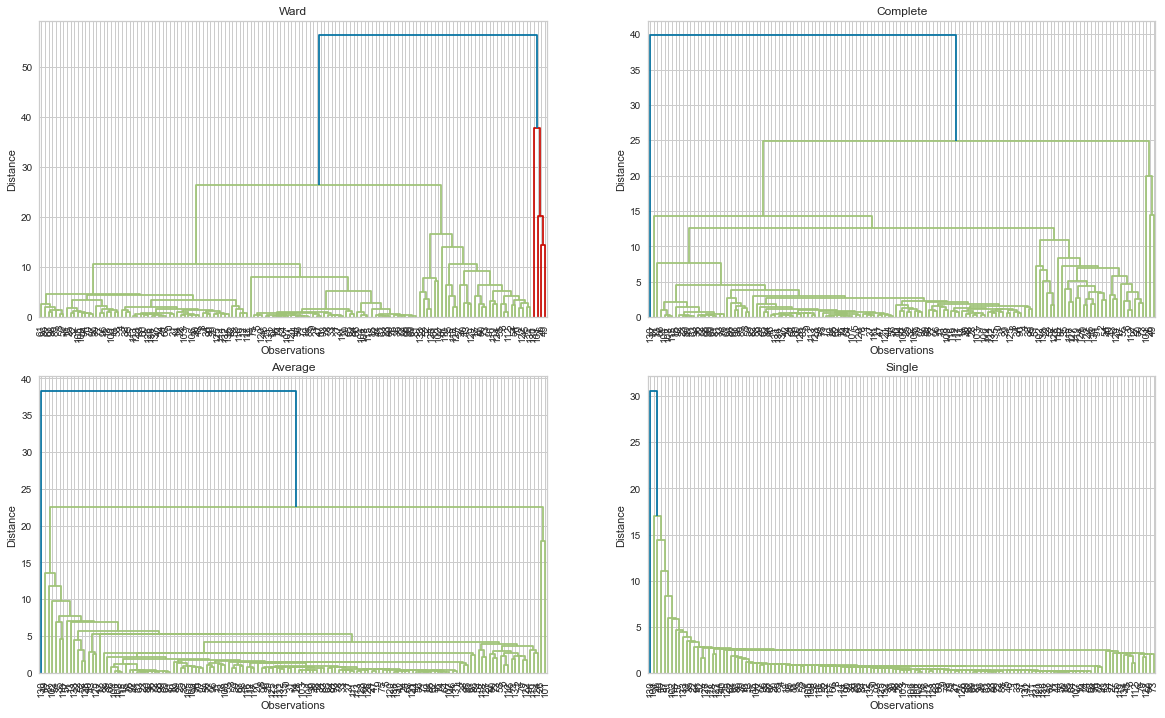

In [271]:
hc_ward = linkage(y = X_scaled, method = "ward")
hc_complete = linkage(X_scaled, "complete")
hc_average = linkage(X_scaled, "average")
hc_single = linkage(X_scaled, "single")

plt.figure(figsize = (20, 12))

plt.subplot(221)
plt.title("Ward")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward, leaf_font_size = 10)

plt.subplot(222)
plt.title("Complete")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_complete, leaf_font_size = 10)

plt.subplot(223)
plt.title("Average")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_average, leaf_font_size = 10)

plt.subplot(224)
plt.title("Single")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_single, leaf_font_size = 10);

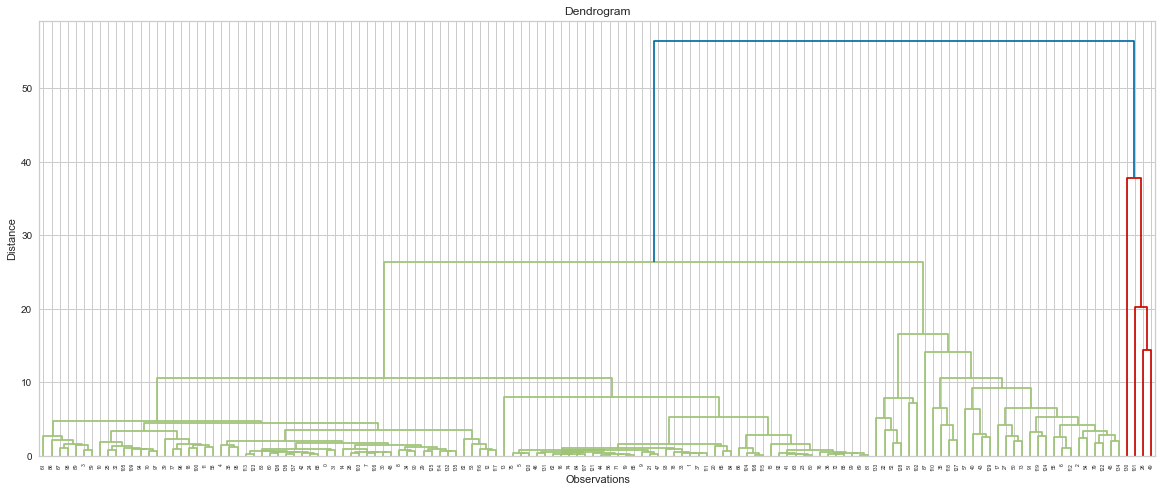

In [272]:
plt.figure(figsize = (20, 8))
plt.title("Dendrogram")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(linkage(X_scaled, method = "ward"), leaf_font_size = 5);

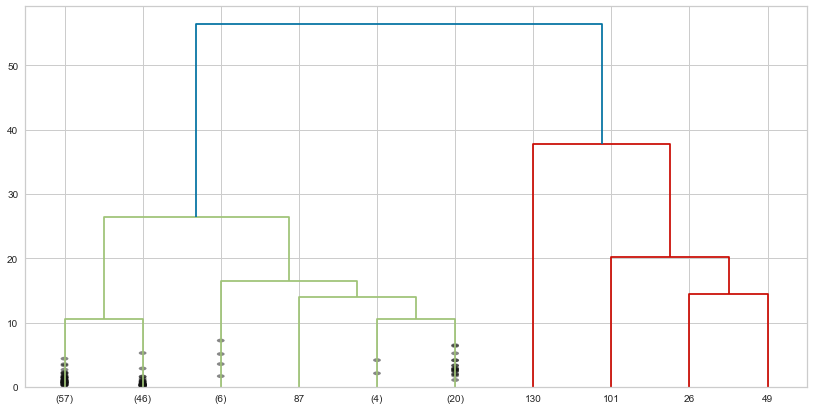

In [273]:
plt.figure(figsize = (14, 7))
dendrogram(hc_ward,
           truncate_mode = "lastp",
           p = 10,
           show_contracted = True,
           leaf_font_size = 10);

### Dendogram

In [274]:
K = range(2, 10)

for k in K:
    HC_model_labels = AgglomerativeClustering(n_clusters = k,  
                                    affinity='euclidean', 
                                    linkage='ward').fit_predict(X_scaled)
    print(f'Silhouette Score for {k} clusters: {silhouette_score(X_scaled, HC_model_labels)}')

Silhouette Score for 2 clusters: 0.8408985171956966
Silhouette Score for 3 clusters: 0.8125071329237178
Silhouette Score for 4 clusters: 0.5223520444633668
Silhouette Score for 5 clusters: 0.5223799559092674
Silhouette Score for 6 clusters: 0.5313080548190874
Silhouette Score for 7 clusters: 0.5307497665889273
Silhouette Score for 8 clusters: 0.5261084671533427
Silhouette Score for 9 clusters: 0.5177740585964993


### Model Building and label visualisation

In [275]:
HC_model = AgglomerativeClustering(n_clusters = 4,
                                affinity='euclidean',
                                linkage='ward')

### Evaluate 

In [276]:
HC_clusters = HC_model.fit_predict(X_scaled)
HC_clusters

array([3, 3, 1, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3,
       1, 3, 3, 3, 0, 1, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 1, 3, 3, 1,
       3, 1, 3, 3, 3, 0, 1, 1, 1, 3, 1, 1, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 1,
       3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 1, 3, 3, 3, 3, 3, 3, 3,
       1, 3, 1, 3, 3, 3, 3, 3, 1, 1, 3, 3, 1, 3, 1, 3, 3, 1, 1, 1, 2, 3,
       3, 1, 1, 3, 3, 3])

In [277]:
value_df["HC_model_cluster"] = HC_model.labels_

In [278]:
value_df["HC_model_cluster"] = HC_model.labels_

In [279]:
value_df

country  Military Strength Power Index  \
0                         Afghanistan                          1.344   
1                             Albania                          2.314   
2                             Algeria                          0.466   
3                              Angola                          0.838   
4                           Argentina                          0.652   
5                             Armenia                          2.125   
6                           Australia                          0.323   
7                             Austria                          0.957   
8                          Azerbaijan                          0.946   
9                             Bahrain                          1.855   
10                         Bangladesh                          0.707   
11                            Belarus                          0.818   
12                            Belgium                          1.050   
13                             Bhutan                         10.168   
14                            Bolivia                          0.994   
15             Bosnia and Herzegovina                          3.859   
16                           Botswana                          2.058   
17                             Brazil                          0.199   
18                           Bulgaria                          0.892   
19                       Burkina Faso                          1.901   
20                           Cambodia                          2.056   
21                           Cameroon                          1.990   
22                             Canada                          0.371   
23           Central African Republic                          3.289   
24                               Chad                          1.638   
25                              Chile                          0.767   
26                              China                          0.069   
27                           Colombia                          0.605   
28                            Croatia                          1.018   
29                               Cuba                          1.221   
30                            Czechia                          0.553   
31   Democratic Republic of the Congo                          1.139   
32                            Denmark                          0.788   
33                 Dominican Republic                          2.750   
34                            Ecuador                          1.006   
35                              Egypt                          0.187   
36                        El Salvador                          3.129   
37                            Estonia                          2.589   
38                           Ethiopia                          0.858   
39                            Finland                          0.850   
40                             France                          0.170   
41                              Gabon                          3.374   
42                            Georgia                          1.668   
43                            Germany                          0.219   
44                              Ghana                          2.055   
45                             Greece                          0.531   
46                          Guatemala                          1.830   
47                           Honduras                          2.094   
48                            Hungary                          0.822   
49                              India                          0.095   
50                          Indonesia                          0.254   
51                               Iran                          0.219   
52                               Iraq                          0.791   
53                            Ireland                          1.948   
54                             Israel                          0.311  

In [280]:
value_df["HC_model_cluster"].value_counts()

3    103
1     31
0      3
2      1
Name: HC_model_cluster, dtype: int64

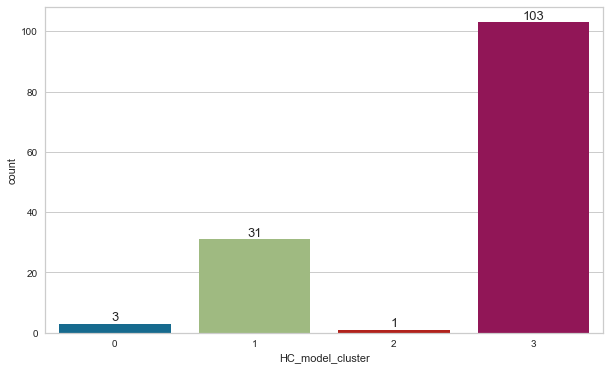

In [281]:
sns.countplot(x=value_df["HC_model_cluster"], data=value_df)

for index, value in enumerate(value_df["HC_model_cluster"].value_counts().sort_index()):
     plt.text(index, value, f"{value}", ha="center", va="bottom", fontsize = 13)

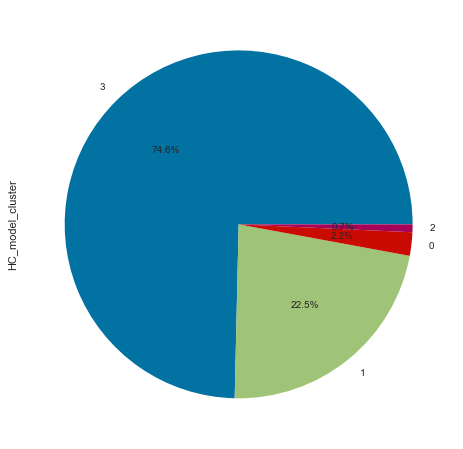

In [282]:
value_df["HC_model_cluster"].value_counts().plot(kind="pie", startangle=0, labeldistance=1.1, autopct='%1.1f%%',figsize=(10, 8));

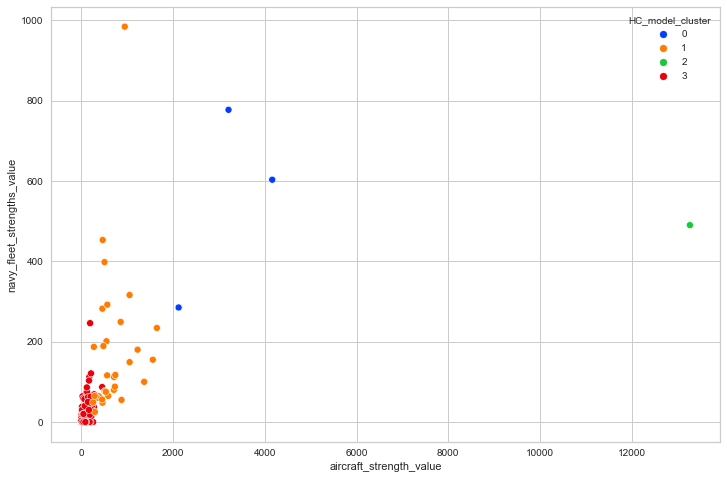

In [283]:
plt.figure(figsize=(12, 8))

sns.scatterplot(value_df["aircraft_strength_value"], 
                value_df["navy_fleet_strengths_value"], hue=value_df["HC_model_cluster"], palette= "bright");

In [284]:
fig = px.scatter_3d(x=value_df["aircraft_strength_value"],
                   y=value_df["defense_spending_budget_value"],
                   z=value_df["external_debt_value"],
                   color=value_df["HC_model_cluster"],
                   labels = {"x": "aircraft_strength_value",
                             "y": "defense_spending_budget_value",
                             "z": "external_debt_value"},
                   hover_name=value_df["country"])

fig.show()

In [285]:
value_df[value_df["HC_model_cluster"] == 0][["country", "Military Strength Power Index"]].sort_values(by="Military Strength Power Index")

country  Military Strength Power Index
101  Russia                          0.068
26    China                          0.069
49    India                          0.095

In [286]:
value_df[value_df["HC_model_cluster"] == 1][["country", "Military Strength Power Index"]].sort_values(by="Military Strength Power Index")

country  Military Strength Power Index
57                  Japan                          0.150
110           South Korea                          0.151
40                 France                          0.170
129        United Kingdom                          0.172
35                  Egypt                          0.187
17                 Brazil                          0.199
124                Turkey                          0.210
55                  Italy                          0.211
43                Germany                          0.219
51                   Iran                          0.219
91               Pakistan                          0.236
50              Indonesia                          0.254
102          Saudi Arabia                          0.303
54                 Israel                          0.311
6               Australia                          0.323
112                 Spain                          0.339
134               Vietnam                          0.356
122              Thailand                          0.357
22                 Canada                          0.371
87            North Korea                          0.372
119                Taiwan                          0.401
127               Ukraine                          0.446
2                 Algeria                          0.466
45                 Greece                          0.531
79                Myanmar                          0.569
27               Colombia                          0.605
73                 Mexico                          0.607
133             Venezuela                          0.645
128  United Arab Emirates                          0.703
52                   Iraq                          0.791
118                 Syria                          0.824

In [287]:
value_df[value_df["HC_model_cluster"] == 2][["country", "Military Strength Power Index"]].sort_values(by="Military Strength Power Index")

country  Military Strength Power Index
130  United States                          0.061

In [288]:
value_df[value_df["HC_model_cluster"] == 3][["country", "Military Strength Power Index"]].sort_values(by="Military Strength Power Index")

country  Military Strength Power Index
96                             Poland                          0.340
109                      South Africa                          0.498
117                       Switzerland                          0.526
89                             Norway                          0.528
116                            Sweden                          0.530
30                            Czechia                          0.553
82                        Netherlands                          0.592
100                           Romania                          0.618
94                               Peru                          0.622
86                            Nigeria                          0.648
4                           Argentina                          0.652
70                           Malaysia                          0.655
10                         Bangladesh                          0.707
25                              Chile                          0.767
95                        Philippines                          0.785
32                            Denmark                          0.788
105                         Singapore                          0.797
132                        Uzbekistan                          0.809
11                            Belarus                          0.818
48                            Hungary                          0.822
3                              Angola                          0.838
77                            Morocco                          0.841
106                          Slovakia                          0.847
39                            Finland                          0.850
38                           Ethiopia                          0.858
97                           Portugal                          0.861
18                           Bulgaria                          0.892
59                         Kazakhstan                          0.910
8                          Azerbaijan                          0.946
103                            Serbia                          0.948
7                             Austria                          0.957
14                            Bolivia                          0.994
34                            Ecuador                          1.006
28                            Croatia                          1.018
12                            Belgium                          1.050
31   Democratic Republic of the Congo                          1.139
58                             Jordan                          1.144
29                               Cuba                          1.221
135                             Yemen                          1.241
90                               Oman                          1.251
114                             Sudan                          1.302
125                      Turkmenistan                          1.329
0                         Afghanistan                          1.344
83                        New Zealand                          1.368
67                              Libya                          1.370
123                           Tunisia                          1.462
113                         Sri Lanka                          1.466
68                          Lithuania                          1.475
60                              Kenya                          1.529
61                             Kuwait                          1.570
126                            Uganda                          1.618
24                               Chad                          1.638
136                            Zambia                          1.646
42                            Georgia                          1.668
98                              Qatar                          1.670
137                          Zimbabwe                          1.758
46                          Guatemala                          1.830
9                           

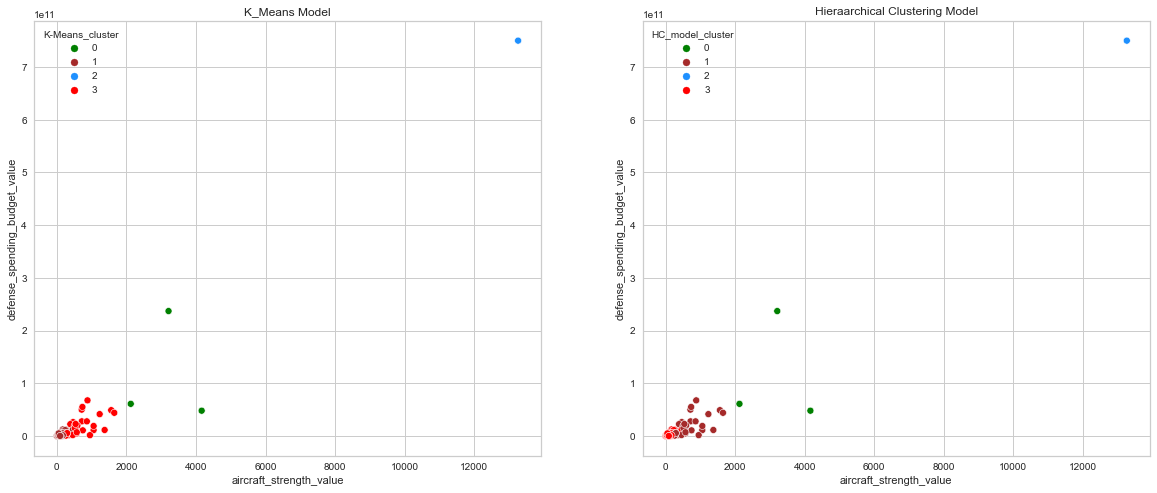

In [289]:
plt.figure(figsize = (20,8))

plt.subplot(121)
sns.scatterplot(x="aircraft_strength_value", y="defense_spending_budget_value", hue='K-Means_cluster', data=value_df, palette=['green', 'brown','dodgerblue','red'])
plt.title("K_Means Model")

plt.subplot(122)
sns.scatterplot(x="aircraft_strength_value", y="defense_spending_budget_value", hue='HC_model_cluster', data=value_df, palette=['green', 'brown','dodgerblue','red'])
plt.title("Hieraarchical Clustering Model");

In [290]:
value_df.groupby(["Military Strength Power Index", "country"]).mean()

aircraft_strength_value  \
Military Strength Power Index country                                                     
0.061                         United States                                   13264.000   
0.068                         Russia                                           4163.000   
0.069                         China                                            3210.000   
0.095                         India                                            2123.000   
0.150                         Japan                                            1561.000   
0.151                         South Korea                                      1649.000   
0.170                         France                                           1229.000   
0.172                         United Kingdom                                    733.000   
0.187                         Egypt                                            1054.000   
0.199                         Brazil                                            715.000   
0.210                         Turkey                                           1055.000   
0.211                         Italy                                             860.000   
0.219                         Germany                                           712.000   
                              Iran                                              509.000   
0.236                         Pakistan                                         1372.000   
0.254                         Indonesia                                         462.000   
0.303                         Saudi Arabia                                      879.000   
0.311                         Israel                                            589.000   
0.323                         Australia                                         464.000   
0.339                         Spain                                             512.000   
0.340                         Poland                                            457.000   
0.356                         Vietnam                                           293.000   
0.357                         Thailand                                          570.000   
0.371                         Canada                                            385.000   
0.372                         North Korea                                       949.000   
0.401                         Taiwan                                            744.000   
0.446                         Ukraine                                           297.000   
0.466                         Algeria                                           551.000   
0.498                         South Africa                                      226.000   
0.526                         Switzerland                                       169.000   
0.528                         Norway                                            150.000   
0.530                         Sweden                                            204.000   
0.531                         Greece                                            566.000   
0.553                         Czechia                                            95.000   
0.569                         Myanmar                                           276.000   
0.592                         Netherlands                                       168.000   
0.605                         Colombia                                          469.000   
0.607                         Mexico                                            484.000   
0.618                         Romania                                           143.000   
0.622                         Peru                                              273.000   
0.645                         Venezuela                                         260.000   
0.648                         Nigeria                                           129.000   
0.652                         Argentina                     

In [291]:
value_df["K-Means_cluster"].value_counts()

1    103
3     31
0      3
2      1
Name: K-Means_cluster, dtype: int64

In [292]:
value_df["HC_model_cluster"].value_counts()

3    103
1     31
0      3
2      1
Name: HC_model_cluster, dtype: int64

In [294]:
value_df["K-Means_Classification"] = value_df["K-Means_cluster"].map({  2 : "Powerfull Army",
                                                            3 : "Medium Power Army",
                                                            1 : "The Most Powerfull Army",
                                                            0 : "Weak Army",
                                                         })

In [295]:
value_df["HC_model_Classification"] = value_df["HC_model_cluster"].map({  0 : "Powerfull Army",
                                                            1 : "Medium Power Army",
                                                            2 : "The Most Powerfull Army",
                                                            3 : "Weak Army",
                                                         })

In [296]:
value_df[["country", 
          'Military Strength Power Index', 
          'K-Means_cluster', 
          'K-Means_Classification', 
          'HC_model_cluster', 
          'HC_model_Classification']]

country  Military Strength Power Index  \
0                         Afghanistan                          1.344   
1                             Albania                          2.314   
2                             Algeria                          0.466   
3                              Angola                          0.838   
4                           Argentina                          0.652   
5                             Armenia                          2.125   
6                           Australia                          0.323   
7                             Austria                          0.957   
8                          Azerbaijan                          0.946   
9                             Bahrain                          1.855   
10                         Bangladesh                          0.707   
11                            Belarus                          0.818   
12                            Belgium                          1.050   
13                             Bhutan                         10.168   
14                            Bolivia                          0.994   
15             Bosnia and Herzegovina                          3.859   
16                           Botswana                          2.058   
17                             Brazil                          0.199   
18                           Bulgaria                          0.892   
19                       Burkina Faso                          1.901   
20                           Cambodia                          2.056   
21                           Cameroon                          1.990   
22                             Canada                          0.371   
23           Central African Republic                          3.289   
24                               Chad                          1.638   
25                              Chile                          0.767   
26                              China                          0.069   
27                           Colombia                          0.605   
28                            Croatia                          1.018   
29                               Cuba                          1.221   
30                            Czechia                          0.553   
31   Democratic Republic of the Congo                          1.139   
32                            Denmark                          0.788   
33                 Dominican Republic                          2.750   
34                            Ecuador                          1.006   
35                              Egypt                          0.187   
36                        El Salvador                          3.129   
37                            Estonia                          2.589   
38                           Ethiopia                          0.858   
39                            Finland                          0.850   
40                             France                          0.170   
41                              Gabon                          3.374   
42                            Georgia                          1.668   
43                            Germany                          0.219   
44                              Ghana                          2.055   
45                             Greece                          0.531   
46                          Guatemala                          1.830   
47                           Honduras                          2.094   
48                            Hungary                          0.822   
49                              India                          0.095   
50                          Indonesia                          0.254   
51                               Iran                          0.219   
52                               Iraq                          0.791   
53                            Ireland                          1.948   
54                             Israel                          0.311  

In [297]:
value_df.groupby(["Military Strength Power Index", "country"]).mean().head(20)

aircraft_strength_value  \
Military Strength Power Index country                                   
0.061                         United States                 13264.000   
0.068                         Russia                         4163.000   
0.069                         China                          3210.000   
0.095                         India                          2123.000   
0.150                         Japan                          1561.000   
0.151                         South Korea                    1649.000   
0.170                         France                         1229.000   
0.172                         United Kingdom                  733.000   
0.187                         Egypt                          1054.000   
0.199                         Brazil                          715.000   
0.210                         Turkey                         1055.000   
0.211                         Italy                           860.000   
0.219                         Germany                         712.000   
                              Iran                            509.000   
0.236                         Pakistan                       1372.000   
0.254                         Indonesia                       462.000   
0.303                         Saudi Arabia                    879.000   
0.311                         Israel                          589.000   
0.323                         Australia                       464.000   
0.339                         Spain                           512.000   

                                              fighter/interceptor_strength_value  \
Military Strength Power Index country                                              
0.061                         United States                             2085.000   
0.068                         Russia                                     873.000   
0.069                         China                                     1232.000   
0.095                         India                                      538.000   
0.150                         Japan                                      279.000   
0.151                         South Korea                                414.000   
0.170                         France                                     269.000   
0.172                         United Kingdom                             133.000   
0.187                         Egypt                                      215.000   
0.199                         Brazil                                      43.000   
0.210                         Turkey                                     206.000   
0.211                         Italy                                       99.000   
0.219                         Germany                                    128.000   
                              Iran                                       155.000   
0.236                         Pakistan                                   356.000   
0.254                         Indonesia                                   41.000   
0.303                         Saudi Arabia                               270.000   
0.311                         Israel                                     259.000   
0.323                         Australia                                   82.000   
0.339                         Spain                                      137.000   

                                              attack_aircraft_strength_value  \
Military Strength Power Index country                                          
0.061                         United States                          715.000   
0.068                         Russia                                 742.000   
0.069                         China                                  371.000   
0.095                         India                                  172.000   
0.150                         Japan                                   12.000   
0.151                         

In [298]:
value_df[value_df["HC_model_cluster"] == 0][["country", "Military Strength Power Index"]].sort_values(by="Military Strength Power Index")

country  Military Strength Power Index
101  Russia                          0.068
26    China                          0.069
49    India                          0.095

CONCLUSION

Both models obtained by K-Means and HCA in our analysis revealed that in the list of the most powerful armies of the world, the first name is that of the United States which has the most modern and strong military power.

The United States is perceived to be the most powerful country again, and has the world’s largest economy and biggest military budget, spending over $750 billion on military hardware and personnel in 2020.

Russia overtakes China and India to be seen as the second-most powerful country. For 2020, China is ranked 3 out of 138 countries holding a PwrIndx rating of 0.069 while India comes 4th in the list holding a PwrIndx rating of 0.095. However, all these three (3) countries are in the same cluster and among the world’s top military spenders. Following the top four (4) are Japan, South Korea, France and the U.K. are countries that have given out large amounts of military spending. France and the U.K took at 7th and 8th places with PwrIndx ratings of 0.170 and 0.172, respectively. Japan is ranked 5th out of 138 countries holding a PwrIndx rating of 0.150. Most probably the country continues to look to the future and viable solutions to growing regional problems – namely the threat from North Korea. South Korea is ranked 6th out of 138 countries holding a PwrIndx rating of 0.151. Similarly, under the ever-present threat of its unpredictable northern neighbor, South Korea manages a large and powerful military force. Egypt, Brazil and Turkey suprisingly overtakes Italy and Germany which are included in No. 8, 9, 10, 11 and 12 respectively.

Countries perceived to be less powerful tended to be smaller nations with medium to small economies. Bhutan, a small country in South Asia, is viewed as the least powerful nation, followed by Liberia, another small country in Afrika. Sierra Leone, Suriname and Somalia round out the bottom five.